# Module 6: CFA
# Investment Use Case: Avoiding Biases in Investment models using Machine Learning 
# =========================================================

Many statistical, behavioural and structural biases can distort the high risk area of investment model development. Investment models are responsible for selecting or recommending individual names or securities for investments, and so the outcomes have a potentially very high impact on stake holders. Investment models are broadly separated into stock selection and portfolio construction models. Stock selection models, because of their granular focus, generally greater data needs and higher complexity, are typically most exposed to biases in model development. Whereas portfolio construction models - a challenging and complex area of research for sure - tends to be more generically based on diversifying return characteristics using, typically covariance or clustering based optimizations. This use case focues on mitigating biases in stock selection models.

Factor based models are used by the vast majority of quanitative investment managers, after Fama and French's seminal research in the early 1990s. Traditional factor approaches use sensitive, linear models that are affected by many biases, that can result in model outcomes not respresenting true causal relationships. This in turn delivers biased results. 

Machine learning gives quantitative managers that still use these approaches, the option to attempt to supe them up. However, the options for retro-fitting ML onto a traditional quant process is not as obvious as it seems, as we shall see.

This use case develops three stock selection models in a global equities universe. 
First, we examine the risk of biases of traditional quant models, based on a linear factor approach, identifying problematic assumptions and violations.
Second, we look to improve this traditional quant approach by bolting on a machine learning elements: traditional quant+ML. We will see that this presents additional risks and biases, as we attempt to improve a traditional quant model using a neural net.
Third, we examine a purpose designed ML approach, designed to avoid or address many of the possible biases in both traditiona quant and traditional quant+ML. 

### References
[1] Philps, D., Tilles, D., & Law, T. (2021). Interpretable, Transparent, and Auditable Machine Learning: An Alternative to Factor Investing. The Journal of Financial Data Science, 3(4), 84-100
 https://jfds.pm-research.com/content/early/2021/09/22/jfds.2021.1.077
 
[2] Fama, E.F. and French, K.R., 2015. A five-factor asset pricing model. Journal of financial economics, 116(1), pp.1-22.

[3] Fabozzi, F. J., Focardi, S. M., & Kolm, P. N. (2010). Quantitative equity investing: Techniques and strategies. John Wiley & Sons.

[4] Israel, R., & Ross, A. (2017). Measuring factor exposures: Uses and abuses. The Journal of Alternative Investments, 20(1), 10-25.

[5] Levin A. (1995). Stock Selection via Nonlinear Multi-Factor Models. Advances in Neural Information Processing Systems, 8.
  https://proceedings.neurips.cc/paper/1995/file/d6ef5f7fa914c19931a55bb262ec879c-Paper.pdf 


### Code Repositories
https://github.com/danphilps/Investment-SAI






Get key packages, download data and get in good shape.

In [124]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# package for navigating the operating system
import os

# Progress bar
from tqdm.notebook import tqdm


# Stage1: Business Case

The business case for investment models tends to be very clear, but it is surprising how few analysts spend time defining the "ground truth" for their models, other than the obvious objective of selecting "higher alpha" securities. "Ground truthing" in this context could be described as getting the decision right for the right reasons, which a positive alpha end point does not necessarily define. For instance a defensive strategy might benefit from a stock that ultimately generates positive alpha, but if the downside characteristics of that stock int eh shorter run are terrible, it could provde to be a bacd investment. In this case the groun truth might simply be, positive alpha AND defensive characteristics. Once the groiund truth has been defined,hypotheses are then needed which can be tested, and an experimental setup is required to test them.





# Stage2: Data

First we pull in the data we need, wrangle it, examine it and prepare it.


## Stage2a. Load Data
Step into the data directory and get the security level returns csv, load this into a DataFrame. This is a iniverse containing developed market, small cap equities, ex-USA (rules to construct this universe were market cap of between approximately $150m and $3bn over the study term, development market countries only excluding the USA).

In [125]:
from google.colab import drive
import os
drv = drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/your_project_folder/'

os.listdir('/content/gdrive/MyDrive/CFAI')
os.chdir('/content/gdrive/MyDrive/CFAI')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Get returns and fundamentals for our universe

In [126]:
# Extract security level returns - Monthly frequency
df_raw_sec_rets = pd.read_csv('US TR.csv')
# Extract security level fundamentals - Monthly frequency
df_raw_sec_ff = pd.read_csv('US FF.csv')

In [127]:
df_raw_sec_ff

,TICKER,NAME,COUNTRY,SECTOR,DATE,ORIG_CURRENCY,FF_TIER1_CAP,FF_TIER2_CAP,FF_CURR_RATIO,FF_GROSS_MGN,...,FF_OPER_MGN,FF_PAY_OUT_RATIO,FF_QUICK_RATIO,FF_ROA,FF_ROE,FF_ROTC,FF_TCAP,FF_PE,FF_DEBT_EBITDA_OPER,EPS_3yr_FCAST
0,ABBY-US,"Abby, Inc.",United States,Retail Trade,11/30/2012,USD,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,-0.026244,NaN,NaN,-0.028366
1,ABCAF-US,Athabasca Minerals Inc.,Canada,Non-Energy Minerals,11/30/2012,USD,NaN,NaN,1.798413,59.335739,...,40.310134,0.000000,1.523741,17.511342,32.608627,28.284208,26.427566,10.4446,1.218430,0.201439
2,ADBE-US,Adobe Incorporated,United States,Technology Services,11/30/2012,USD,NaN,NaN,3.405821,87.824414,...,26.220002,0.000000,3.405821,8.781904,13.379744,14.822829,8173.337000,20.8494,1.042719,2.240656
3,AGFMF-US,AGF Management Limited Class B,Canada,Finance,11/30/2012,USD,NaN,NaN,NaN,53.333882,...,14.907044,220.386587,NaN,0.801807,2.373098,4.798239,1372.359189,18.1819,1.677409,0.838450
4,AJRD-US,"Aerojet Rocketdyne Holdings, Inc.",United States,Electronic Technology,11/30/2012,USD,NaN,NaN,1.155367,13.398331,...,4.784400,NaN,1.008161,-0.613299,NaN,NaN,-144.000000,NaN,3.557940,0.142147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,LDDD-US,Longduoduo Co Ltd,China,Health Services,06/30/2022,USD,NaN,NaN,0.260321,67.110275,...,-233.332376,NaN,0.258461,-1337.053911,NaN,NaN,-0.747539,NaN,NaN,-0.033411
11224,MARPS-US,Marine Petroleum Trust,United States,Miscellaneous,06/30/2022,USD,NaN,NaN,NaN,NaN,...,83.512005,79.063279,NaN,117.129541,117.129541,117.129541,1.154143,12.3568,0.000000,0.638355
11225,SANB-US,Sanaby Health Acquisition Corp. I Class A,United States,Finance,06/30/2022,USD,NaN,NaN,0.647732,NaN,...,NaN,0.000000,0.647732,4.961293,5.225007,-1.546431,167.412240,51.4872,NaN,0.033402
11226,ZHEC-US,ZHRH Corporation,United States,Consumer Durables,06/30/2022,USD,NaN,NaN,0.192986,NaN,...,NaN,NaN,0.192986,-655.456772,NaN,NaN,-0.094659,NaN,NaN,-0.010492


Extract factor returns from the Ken French data library

In [128]:
# Libraries...
import urllib.request
import zipfile
import csv

# Get factor returns from the Ken French data repository
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Developed_ex_US_5_Factors_CSV.zip"
# Download the file and save it
# We will name it fama_french.zip file
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
# Next we extact the file data
# We will call it ff_factors.csv
zip_file.extractall()
# Make sure you close the file after extraction
zip_file.close()

# Extract into a dataframe
df_ff_factors = pd.read_csv('Emerging_5_Factors.csv', skiprows = 3)

# Data wrangling... remove invalid rows (annual factors)
# There is white space in the date columns... strip this out
df_ff_factors.iloc[:,0] = df_ff_factors.iloc[:,0].str.strip()

# Find the start of the invalid rows and remove them all...
for row in range(1,df_ff_factors.shape[0]):
  if df_ff_factors.iloc[row,0].isnumeric() == False:
    break
df_ff_factors = df_ff_factors.drop(df_ff_factors.index[row:])

df_ff_factors.index = df_ff_factors.iloc[:,0]
df_ff_factors = df_ff_factors.drop(columns=df_ff_factors.columns[0], axis=1)

df_ff_factors = df_ff_factors.sort_index(axis=0, ascending=False)
df_ff_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Unnamed: 0,,,,,,
202207,0.23,0.78,1.48,0.08,1.18,0.08
202206,-6.77,0.13,-1.00,-1.51,0.37,0.06
202205,0.26,-1.54,-0.85,-0.14,1.66,0.03
202204,-5.26,0.55,3.49,0.37,1.70,0.00
202203,-1.57,0.45,2.90,-1.13,1.16,0.00
...,...,...,...,...,...,...
198911,0.72,0.43,2.22,-99.99,-99.99,0.69
198910,-2.18,-0.49,-4.36,-99.99,-99.99,0.68
198909,14.41,3.32,-7.70,-99.99,-99.99,0.65


### Stage2b. Data Wrangling and Preprocessing

We want the data with dates as rows, securities as columns (and factors as columns in the factor data). 
The latest date should be the top row... dates should all be the same format in each file.


Returns and fundamental data, pivot data so that rows are dates (latest date in the top row), columns are factors or securities:

In [129]:
# Function to extract a single data item from the raw data. We will call it further below.
def extract_dataitem_from_ff(df_raw: pd.DataFrame,
                             col_to_extract: str = '') -> pd.DataFrame:
  
  
  # Sort columns and index
  df_extract = pd.pivot(df_raw, index='TICKER', columns='DATE', values=col_to_extract)
  
  # Alter dates to YYYYMMDD format
  df_extract.columns = pd.DataFrame(df_extract.columns ).iloc[:,0].apply(lambda x: int(x[6:] + x[0:2]))
  df_extract = df_extract.sort_index(ascending=False, axis=1)
  df_extract = df_extract.sort_index(ascending=False, axis=0)

  return df_extract

In [130]:


# Extract all fundamental/valuation/metric dataitems from raw data into a security/date matrix (ignore static data columns)
# Create a dictionary of all the data items 
dict_sec_ff = dict()

#Extract all data items
for di in df_raw_sec_ff.columns:
  if di not in ['TICKER', 'DATE','ADJDATE',	'ORIG_CURRENCY', 'NAME', 'COUNTRY', 'SECTOR']:
    dict_sec_ff[di] = extract_dataitem_from_ff(df_raw_sec_ff, di)
    # lag and front fill 

# Backfill all values - so as we have financial reporting data populated between fiscal-end/filing dates
for idx in dict_sec_ff:
  if di not in ['TICKER', 'DATE','ADJDATE',	'ORIG_CURRENCY', 'NAME', 'COUNTRY', 'SECTOR']:
    for i in range(dict_sec_ff[idx].shape[1]):
      dict_sec_ff[idx].iloc[:, i:i+12] = dict_sec_ff[idx].iloc[:, i:i+12].fillna(method="bfill", axis=1)



In [131]:
df_raw_sec_rets

,TICKER,FSYM_ID,DATE,CURRENCY,PRICE_DATE,MTD_RETURN_LOCAL,MTD_RETURN_USD
0,A-PE,CQCCW6-L,03/31/2021,NaN,03/29/2021,NaN,NaN
1,A-PE,CQCCW6-L,06/30/2021,NaN,06/03/2021,NaN,NaN
2,A-PE,CQCCW6-L,09/30/2021,NaN,09/15/2021,37.7200,37.7200
3,A-US,FWHC5K-R,11/30/2012,USD,11/30/2012,6.3907,6.3907
4,A-US,FWHC5K-R,12/31/2012,USD,12/31/2012,7.1840,7.1840
...,...,...,...,...,...,...,...
325403,HLLOF-US,W4LXZ1-R,01/31/2019,USD,01/04/2019,0.2345,0.2345
325404,HLLOF-US,W4LXZ1-R,04/30/2019,USD,04/24/2019,13.7059,13.7059
325405,HLLOF-US,W4LXZ1-R,08/31/2019,USD,08/12/2019,14.6555,14.6555
325406,HLLOF-US,W4LXZ1-R,09/30/2019,USD,09/18/2019,0.7635,0.7635


In [132]:
dict_sec_ff['FF_ROE']

DATE,202207,202206,202203,202201,202112,202111,202110,202109,202108,202107,...,201308,201307,201306,201305,201304,201303,201302,201301,201212,201211
TICKER,,,,,,,,,,,,,,,,,,,,,
ZZ-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZTS-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.257423,11.257423,11.257423,11.257423,11.257423,11.257423,11.257423,11.257423,11.257423,NaN
ZTMUF-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-13.187976,-13.187976,-13.187976,-13.187976,-13.187976,-13.187976,-13.187976,-13.187976,-13.187976,-13.187976
ZRFY-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZRDZF-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.261313,75.261313,75.261313,75.261313,75.261313,75.261313,75.261313,75.261313,75.261313,75.261313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAG-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA-US,NaN,NaN,NaN,-4.580358,-4.580358,-4.580358,-4.580358,-4.580358,-4.580358,-4.580358,...,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,NaN
AA-CL,NaN,NaN,NaN,-4.580358,-4.580358,-4.580358,-4.580358,-4.580358,-4.580358,-4.580358,...,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,1.412565,NaN


In [133]:
# pivot total returns
df_sec_rets = extract_dataitem_from_ff(df_raw_sec_rets, 'MTD_RETURN_USD')
df_sec_rets = df_sec_rets/100

# Transpose
df_sec_rets = df_sec_rets.T

# ***********************************************
# Remove underpopulated **** Note that this could 
# Kill all securities with with any na returns in the period.
secs_valid = (df_sec_rets.isna().sum(axis=0) < (df_sec_rets.shape[0] * 0.60))
df_sec_rets = df_sec_rets[df_sec_rets.columns[secs_valid]]
# ***********************************************

# Get the securities universe
secs_universe = list(dict_sec_ff.values())[0].index.unique()
secs_universe = [col for col in df_sec_rets.columns if col in secs_universe]

# Only use returns where we have valid fundamental data
df_sec_rets = df_sec_rets[secs_universe]

Risk free retuns data:

In [134]:
df_sec_rets


TICKER,HLLOF-US,HLIT-US,HLIO-US,HLFDF-US,HLF-US,HLE-EC,HLDVF-US,HLDCY-US,HL-US,HKTTY-US,...,AAOI-US,AAME-US,AAMC-US,AAL-US,AAIC-US,AAGRY-US,AACAY-US,AACAF-US,AA-US,A-US
DATE,,,,,,,,,,,,,,,,,,,,,
202210,NaN,0.182096,0.122245,0.290780,0.068879,0.019231,-0.040636,-0.097122,0.159898,-0.036565,...,0.011029,0.003497,-0.057107,0.177741,0.117647,0.018082,0.210526,-0.094340,0.162507,0.140106
202209,NaN,0.160746,-0.073599,-0.027586,-0.237639,0.000000,-0.103732,-0.174872,NaN,-0.136564,...,0.128631,-0.043478,-0.223645,-0.073133,-0.150000,-0.132492,-0.164835,NaN,-0.319725,-0.052242
202208,NaN,0.031136,-0.206335,-0.318934,0.068824,0.039792,-0.073381,-0.002915,-0.128982,0.004434,...,0.401163,0.023973,0.135347,-0.052516,0.009464,0.003165,-0.036884,-0.072500,-0.025708,-0.043624
202207,NaN,0.259516,0.040235,0.239437,0.193643,0.000200,-0.055707,-0.067935,0.155612,0.055745,...,0.109677,0.093633,0.744577,0.081230,-0.024615,-0.039514,-0.167533,-0.159664,0.116498,0.131062
202206,NaN,-0.099688,-0.031716,-0.601124,-0.061496,NaN,-0.109058,-0.104628,-0.169492,-0.066879,...,-0.345992,-0.149682,-0.022518,-0.290431,-0.068768,-0.201456,0.080952,0.122642,-0.261504,-0.068909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201303,NaN,0.017575,0.172037,-0.064000,-0.063535,0.000000,-0.017518,-0.011544,-0.146154,NaN,...,NaN,-0.008767,0.040462,NaN,0.035110,NaN,0.141407,0.215000,NaN,0.014706
201302,NaN,0.087954,0.010507,-0.067164,0.109306,0.060241,-0.039271,-0.034819,-0.116191,NaN,...,NaN,0.008955,0.031809,NaN,0.103979,NaN,0.090348,0.055409,-0.032972,-0.073694
201301,NaN,0.031558,0.058282,-0.008326,0.102611,0.000000,0.007062,0.001395,-0.099485,NaN,...,NaN,0.084142,0.533537,NaN,0.125181,NaN,0.101190,0.101744,0.018433,0.093796


Factor data:

In [135]:
# Get FF factors sorted and transposed...
# Rows are dates (latest date in the top row), columns are factors or securities...
df_ff_factors = df_ff_factors.sort_index(ascending=False)
# Set row index as dates
df_ff_factors.index = df_ff_factors.index.astype(int)
# Force type to float
df_ff_factors = df_ff_factors.astype(dtype=float)
# stated at percentages? No...
df_ff_factors = df_ff_factors/100

# Separate RF from the Factor DataFrame
df_tb3ms = df_ff_factors[['RF']]

# Set row index as dates
df_tb3ms.index = df_tb3ms.index.astype(int)

# Remove RF from the factor data
df_ff_factors = df_ff_factors[['Mkt-RF','SMB','HML','RMW','CMA']] # << AN error here may indicate we have picked up the wrong factor file.

#Check...
df_tb3ms.head()

#Check...
df_ff_factors.head()

,Mkt-RF,SMB,HML,RMW,CMA
Unnamed: 0,,,,,
202207,0.0023,0.0078,0.0148,0.0008,0.0118
202206,-0.0677,0.0013,-0.0100,-0.0151,0.0037
202205,0.0026,-0.0154,-0.0085,-0.0014,0.0166
202204,-0.0526,0.0055,0.0349,0.0037,0.0170
202203,-0.0157,0.0045,0.0290,-0.0113,0.0116


Security level returns data:

In [136]:
df_sec_rets

TICKER,HLLOF-US,HLIT-US,HLIO-US,HLFDF-US,HLF-US,HLE-EC,HLDVF-US,HLDCY-US,HL-US,HKTTY-US,...,AAOI-US,AAME-US,AAMC-US,AAL-US,AAIC-US,AAGRY-US,AACAY-US,AACAF-US,AA-US,A-US
DATE,,,,,,,,,,,,,,,,,,,,,
202210,NaN,0.182096,0.122245,0.290780,0.068879,0.019231,-0.040636,-0.097122,0.159898,-0.036565,...,0.011029,0.003497,-0.057107,0.177741,0.117647,0.018082,0.210526,-0.094340,0.162507,0.140106
202209,NaN,0.160746,-0.073599,-0.027586,-0.237639,0.000000,-0.103732,-0.174872,NaN,-0.136564,...,0.128631,-0.043478,-0.223645,-0.073133,-0.150000,-0.132492,-0.164835,NaN,-0.319725,-0.052242
202208,NaN,0.031136,-0.206335,-0.318934,0.068824,0.039792,-0.073381,-0.002915,-0.128982,0.004434,...,0.401163,0.023973,0.135347,-0.052516,0.009464,0.003165,-0.036884,-0.072500,-0.025708,-0.043624
202207,NaN,0.259516,0.040235,0.239437,0.193643,0.000200,-0.055707,-0.067935,0.155612,0.055745,...,0.109677,0.093633,0.744577,0.081230,-0.024615,-0.039514,-0.167533,-0.159664,0.116498,0.131062
202206,NaN,-0.099688,-0.031716,-0.601124,-0.061496,NaN,-0.109058,-0.104628,-0.169492,-0.066879,...,-0.345992,-0.149682,-0.022518,-0.290431,-0.068768,-0.201456,0.080952,0.122642,-0.261504,-0.068909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201303,NaN,0.017575,0.172037,-0.064000,-0.063535,0.000000,-0.017518,-0.011544,-0.146154,NaN,...,NaN,-0.008767,0.040462,NaN,0.035110,NaN,0.141407,0.215000,NaN,0.014706
201302,NaN,0.087954,0.010507,-0.067164,0.109306,0.060241,-0.039271,-0.034819,-0.116191,NaN,...,NaN,0.008955,0.031809,NaN,0.103979,NaN,0.090348,0.055409,-0.032972,-0.073694
201301,NaN,0.031558,0.058282,-0.008326,0.102611,0.000000,0.007062,0.001395,-0.099485,NaN,...,NaN,0.084142,0.533537,NaN,0.125181,NaN,0.101190,0.101744,0.018433,0.093796


Let's view our data... right orientation? no nan?

In [137]:
df_tb3ms.head()
df_ff_factors.head()
df_sec_rets.head()

TICKER,HLLOF-US,HLIT-US,HLIO-US,HLFDF-US,HLF-US,HLE-EC,HLDVF-US,HLDCY-US,HL-US,HKTTY-US,...,AAOI-US,AAME-US,AAMC-US,AAL-US,AAIC-US,AAGRY-US,AACAY-US,AACAF-US,AA-US,A-US
DATE,,,,,,,,,,,,,,,,,,,,,
202210,NaN,0.182096,0.122245,0.290780,0.068879,0.019231,-0.040636,-0.097122,0.159898,-0.036565,...,0.011029,0.003497,-0.057107,0.177741,0.117647,0.018082,0.210526,-0.094340,0.162507,0.140106
202209,NaN,0.160746,-0.073599,-0.027586,-0.237639,0.000000,-0.103732,-0.174872,NaN,-0.136564,...,0.128631,-0.043478,-0.223645,-0.073133,-0.150000,-0.132492,-0.164835,NaN,-0.319725,-0.052242
202208,NaN,0.031136,-0.206335,-0.318934,0.068824,0.039792,-0.073381,-0.002915,-0.128982,0.004434,...,0.401163,0.023973,0.135347,-0.052516,0.009464,0.003165,-0.036884,-0.072500,-0.025708,-0.043624
202207,NaN,0.259516,0.040235,0.239437,0.193643,0.000200,-0.055707,-0.067935,0.155612,0.055745,...,0.109677,0.093633,0.744577,0.081230,-0.024615,-0.039514,-0.167533,-0.159664,0.116498,0.131062
202206,NaN,-0.099688,-0.031716,-0.601124,-0.061496,NaN,-0.109058,-0.104628,-0.169492,-0.066879,...,-0.345992,-0.149682,-0.022518,-0.290431,-0.068768,-0.201456,0.080952,0.122642,-0.261504,-0.068909


#### Data Wrangling: Date alignment
Enforce the end and start dates and ensure date alignment across all data we are using... take the data with the earliest end date as the end date for all series... do the same for the start date too.

In [138]:
# Enforce the end date...
# Get the date_end that we will use, this will be the study end date...
date_end = min([max(df_tb3ms.index.astype(int)), max(df_ff_factors.index.astype(int)), max(df_sec_rets.index.astype(int))])

# Remove all date columns after the date_end
df_tb3ms = df_tb3ms.drop(index=df_tb3ms.index[df_tb3ms.index.astype(int) > date_end])
df_ff_factors = df_ff_factors.drop(index=df_ff_factors.index[df_ff_factors.index.astype(int) > date_end])
df_sec_rets = df_sec_rets.drop(index=df_sec_rets.index[df_sec_rets.index.astype(int) > date_end])

# Enforce the start date...
# Get the date_start that we will use, this will be the study start date...
date_start = max([min(df_tb3ms.index.astype(int)), min(df_ff_factors.index.astype(int)), min(df_sec_rets.index.astype(int))])

# Remove all date columns after the date_end
df_tb3ms = df_tb3ms.drop(index=df_tb3ms.index[df_tb3ms.index.astype(int) < date_start])
df_ff_factors = df_ff_factors.drop(index=df_ff_factors.index[df_ff_factors.index.astype(int) < date_start])
df_sec_rets = df_sec_rets.drop(index=df_sec_rets.index[df_sec_rets.index.astype(int) < date_start])

Sanity check you data for errors and (silly) mistakes. Eye ball the distributions and correlations too. Here are some of the checks you can do.

1. Date alignment errors
2. Check all percentages are formatted correctly
3. Check nan values have a low count

#### Governance: Validation check on our data
Validating the input data to ensure it is in the right shape, the dates are correctly aligned, formats and conventions are clear (eg whether percentages are staged as decimals (10.0) or percentages (0.10)? And ensuring here are no obvious holes in the data we will use. 

There are many more checks we can add here, including loading independent data sources to spot check stock level data, placing sensible bounds on variables based on our expereiences (eg the USD risk free rate should not be below 0%, or about 15% in the history we are using). As obvious as these checks may be to you now, picking up such errors in the depths of the data process driving a production model would not be obvious at all.

In [139]:
# Sanity checking
# 1: Dates are aligned?
if  (df_tb3ms.index.equals(df_ff_factors.index) == False) | (df_ff_factors.index.equals(df_sec_rets.index) == False):
  raise TypeError('Sanity: Dates are not aligned...')

# 2: Percentages are percentages (not decimals)? 
# Check df_tb3ms median is within median +/- 2standard deviations of df_ff_factors
med_abs = df_ff_factors.iloc[:,:].abs().median(skipna=True).median(skipna=True)
sd = df_ff_factors.iloc[:,:].std(skipna=True).median(skipna=True)
if (med_abs + sd*5 < df_tb3ms.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_tb3ms.iloc[0,:].abs().median(skipna=True)):  
  raise TypeError('Sanity: df_ff_factors values to be outside of a sensible range...')  
if (med_abs + sd*5 < df_sec_rets.abs().median(skipna=True).median(skipna=True)) | (med_abs - sd*5 > df_sec_rets.abs().median(skipna=True).median(skipna=True)):  
  raise TypeError('Sanity: df_ff_factors values to be outside of a sensible range...')  

# Check df_ff_factors median is within median +/- 2standard deviations of df_ff_factors
med_abs = df_tb3ms.iloc[0,:].abs().median(skipna=True) # only one row... only one median call needed
sd = df_tb3ms.iloc[0,:].std(skipna=True) # only one row... no median call needed
if (med_abs + sd*5 < df_ff_factors.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_ff_factors.iloc[0,:].abs().median(skipna=True)):  
  raise TypeError('Sanity: df_tb3ms values to be outside of a sensible range...')  
if (med_abs + sd*5 < df_sec_rets.abs().median(skipna=True).median(skipna=True)) | (med_abs - sd*5 > df_sec_rets.abs().median(skipna=True).median(skipna=True)):  
  raise TypeError('Sanity: df_tb3ms values to be outside of a sensible range...')  

# Check df_sec_rets median is within median +/- 2standard deviations of df_ff_factors
med_abs = df_sec_rets.abs().median(skipna=True).median(skipna=True)
# median of each row, median across rows
sd = df_sec_rets.std(skipna=True).median(skipna=True) # std of each row, median across rows
if (med_abs + sd*5 < df_tb3ms.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_tb3ms.iloc[0,:].abs().median(skipna=True)):  
  raise TypeError('Sanity: df_sec_rets values appear to be outside of a sensible range...')  
if (med_abs + sd*5 < df_ff_factors.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_ff_factors.iloc[0,:].abs().median(skipna=True)):  
  raise TypeError('Sanity: df_sec_rets values appear to be outside of a sensible range...')  

# 3: Many nan? 
if df_tb3ms[df_tb3ms==np.nan].count().sum() / (df_tb3ms.shape[0]*df_tb3ms.shape[1]) > 0.33:
  raise TypeError('Sanity: df_tb3ms; > 33% of values are nan')  
if df_ff_factors[df_ff_factors==np.nan].count().sum() / (df_ff_factors.shape[0]*df_ff_factors.shape[1]) > 0.33:
  raise TypeError('Sanity: df_ff_factors; > 33% of values are nan')  
if df_sec_rets[df_sec_rets==np.nan].count().sum() / (df_sec_rets.shape[0]*df_sec_rets.shape[1]) > 0.33:
  raise TypeError('Sanity: df_sec_rets; > 33% of values are nan')  


In [140]:
df_tb3ms.iloc[0,:]

RF    0.0008
Name: 202207, dtype: float64

## Stage2c. Exploratory data analysis (EDA)

For investment models EDA should encompass data types (interval, cardinal, nominal), distributions, correlations, and more. It is a good idea to examine pairwise distributions of input variables to ensure colinearities (and other relationships) do not exist.  

#### Bias Alert: Linear Regression Violations

The four most common violations of classical regression theory that occur in cross-sectional factor models are: 

1. multicollinearity*: correrlation in input variables
2. the errors in variables problem**: where incorrectly measured variables or proxy variables are used
3. common variation in residuals** such as heteroskedasticity
4. endogeneity***: where the returns from the stock we are modelling affect the input variables. This might be caused by too many investors using similar models.

*: Multicolinearity is best dealt with by removing collinear variables from the regression
**: There are statistical techniques that address 2, and 3.
***: Endogenous bias is extremely difficult to detect and deal with. We will come onto this.


In [141]:
# Functions for EDA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import shapiro

# Function we will call to add R2 and p-val to the off-diagonal cells of the pair plot
def R2func(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    _, _, r, p, _ = stats.linregress(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(f'p-val = {p:.2f}', xy=(.1, .8), xycoords=ax.transAxes)

# Function we will call to add normality test stat and p-val to diagnonal cells of pair plot
# Note that inputs to linear regression are not required to be normally distributed.
def normalityfunc(x, hue=None, ax=None, **kws):
    """Plot the Shapiro Wilk p-value in the top left hand corner of diagonal cells."""
    stat, p = shapiro(x)
    ax = ax or plt.gca()
    ax.annotate(f'Shapiro-Wilk stat = {stat:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(f'p-val = {p:.2f}', xy=(.1, .8), xycoords=ax.transAxes)


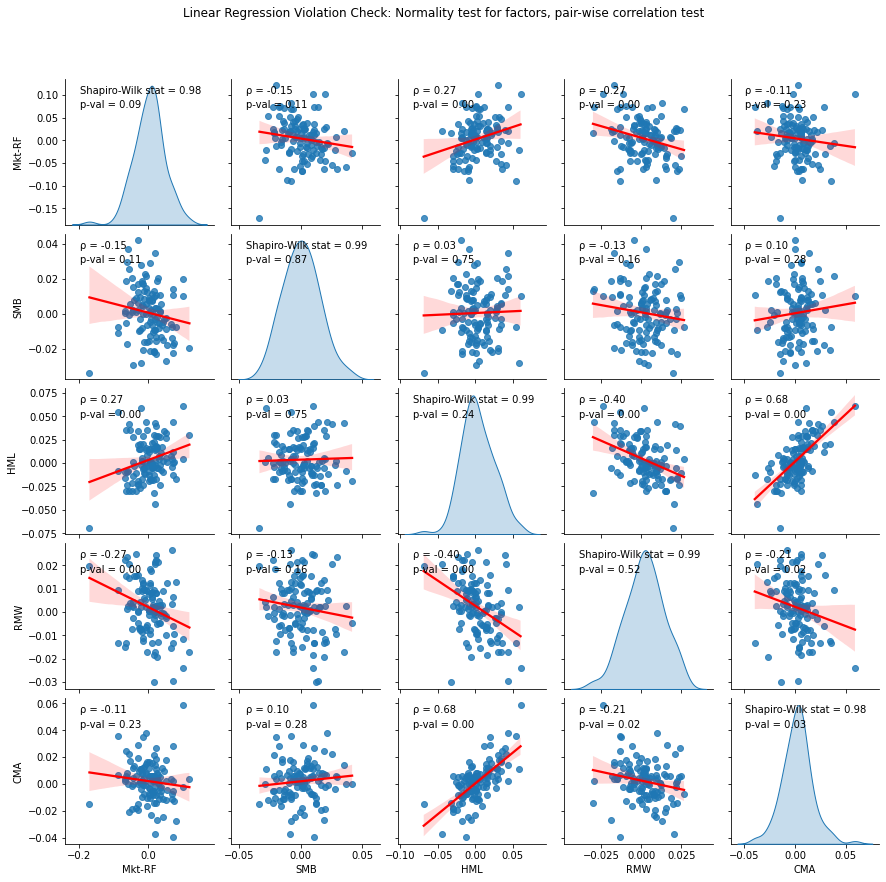

In [142]:
# Run EDA Functions on our dataset

# Generate pairplot
pp = sns.pairplot(df_ff_factors, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

# Run the R2func for all off diagnonal cells, and normalityfunc for the diagonal ones...
pp.map_lower(R2func)
pp.map_upper(R2func)
pp.map_diag(normalityfunc)

# Title...
pp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

pp.fig.suptitle('Linear Regression Violation Check: Normality test for factors, pair-wise correlation test')

plt.show()


# Stage3: Model Design

#### Bias Alert: Complexity Bias (Training Window Size)
Part of model validation in timeseries domains is to run historic simulations, and to avoid data snooping bias, we need to use a small subset of the data we have. A relatively long history of returns is required to learn a linear regrssion model with many input variables[1], less for a classification model. If we use a ML model, which generally have more parameters, we need even more data for training. In short, we may not have high enough frequency data to train a stable model. This problem is exaccerbated when running simulations, as to avoid data snooping bias we must only use a subset of our full dataset that preceeds each simulation date.   

The more samples we have, and the more accurate the data, the more accurate our model will be. The more data we have the more features and model parameters  (ie complexity) we can employ to approximate our target function. However, there is a balanmcing act between complexity and the data available, and if our model becomes too complex for the amount of data we will likely overfit to the data, and our model will not perform well out of sample. It will be a bad predictor.

For linear factor models, the analogue is that these models assume: 
$$N >> K$$
[2] , a serious limitation requiring explicit dimensionality reduction, in a world with expanding data resources .


So how much data do we need for our chosen model? And what is the maximum number of features we should use?


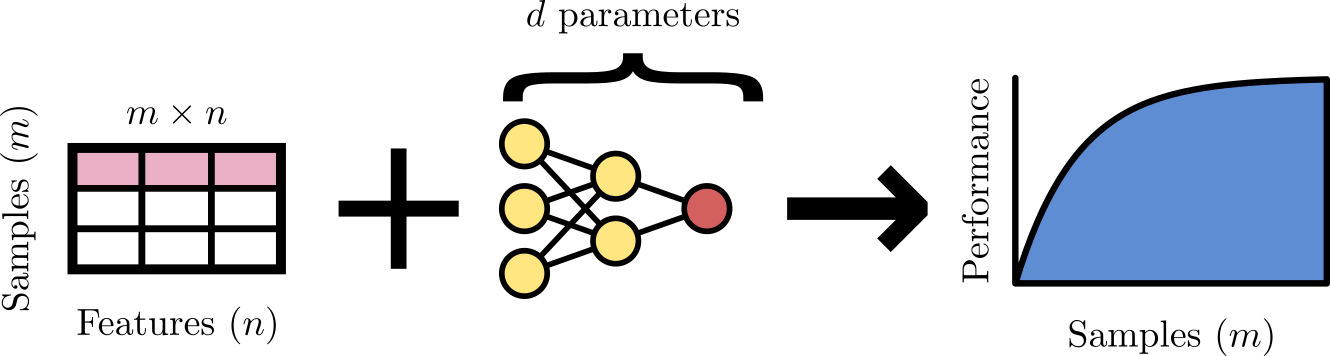


### Model complexity1: Instances vs features and classes used
A rule of thumb for the number of instances, N, needed to train a stable model with K input features, for a classification model with C categories to classify:

N ≥ 10 K · C,

instances. For a regression model:

N ≥ 50 K,

instances are suggested.


### Model complexity2: Instances vs parameters
A rule of thumb for the limit on number of parameters, ¦θ¦, our model should have, given the size of our training data [3], we suggest this: 

¦θ¦ ≤ N/10 


[1] Robert C. Merton, “On Estimating the Expected Return on the Market: An Exploratory Investigation,” Journal of Financial Economics, 8 (1980), pp. 323–361.

[2] Valliappa Lakshmanan, Sara Robinson, and Michael Munn. Machine learning design patterns. O’Reilly Media, 2020

[3] Kevin P. Murphy, Probabilistic machine learning: an introduction. MIT press, 2022

In [143]:
#***********************************************************************
#*** Complexity bias Sanity Check!***
#***********************************************************************  
def bias_complexity_check_regression(no_of_instances: int,
                          no_of_features: int = 0,
                          no_of_parameters: int = 0) -> (bool, int, int):

  failed = False
  cb_K = no_of_features
  cb_n = no_of_instances
  
  # 1. Feature complexity: n ≥ 50 K
  if cb_n > 50 * cb_K:
    failed = True
  
  feature_max = int(round(cb_n / 50, 0))

  # 2. Parameter complexity: ¦θ¦ ≤ n/10
  #
  # The number of model parameters (ie weights) should observe the constraint
  # wrt training instances, n, features, K:
  #
  # |theta| >= n/10  
  param_max = int(round(cb_n / 10, 0))
  
  if no_of_parameters > param_max:
    failed = True

  return (failed, feature_max, param_max)


## 3a. Traditional Quantitative approach: Linear Factors

We first examine a traditional quantitative approach noting the biases involved in the construction of a traditional stock selection model, the basis of quantitative equity investment approaches for the vast majority of quant managers.
We will use a fundamental factor model, also known as a cross-sectional factor model, after Fama and French. These models use linear regression to fit common factors (value (HML), small cap (SMB), etc) to stock returns, by learning coefficients (betas or factor loadings) for each factor. This has the familar form:
$$
R_{it} = α_{i} + \sum\limits_{j=1}^{K} \beta_{ij} f_{ij} + ϵ_{ij} \qquad \text{where}\; i=1,\dots, N\; j=1,\dots, K
$$
Where $R_{it}$ is the return of stock $i$ at time $t$, $\beta$ is the exposure (loading) of stock $i$, representing an observed source of inefficiency such as value, $f$ is the return of a reference portfolio $j$. 

We will first learn the loadings of each stock to each of the factors in the dataset, and we will then use these loadings and the factor returns to determine the expected return of each stock to form model portfolios.     


We now specify our model training process, using OLS regression, with the option of robust standard errors. We will wrap this up as a function, so as we can call it multiple times over the study term, to generate trades for each month.

Note that we sanity check parameters, to provide basic checks, and we analyse the residuals produced by the model to ensure residuals are normally distributed (using a SHapiro-Wilk test in this case, with the option of generating a scatter plot in the function too).
Let us run the function, using our 5 factor regression on the first security in the dataset, column=0.

Many refinements can be made to this simple model.

### 3a. i) Prep data

Our data is ready and prepared to pass into our train and predict functions.


### 3a. ii) Train, and Forecast Functions

Now we need functions to train our neural net, and to provide the final forecast of stock returns in a given time period. 
We will need these function to generate expected returns which will feed into our trade generating function, decaled earlier, and our simulation function, declared earlier.

In [144]:
# Packages to use...
import statsmodels
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Function that will run our OLS model to determine factor loadings, for a given security, 
# over a given period
# Note the two optional parameter... 
#   use_robust_cm: estimate from a robust covariance matrix
#   plot_residual_scatter: which will generate a scatter plot of our residuals (y vs y_hat)
def factormodel_train_single_security(sec_col_no: int,
                     df_tb3ms: pd.DataFrame,
                     df_sec_rets: pd.DataFrame,
                     df_ff_factors: pd.DataFrame,
                     date_start: int,
                     date_end: int,
                     use_robust_cm: bool = False,
                     plot_residual_scatter: bool = False) -> (object, np.array, np.array, float, float):
  
  # sanity
  if date_start < date_end: 
    raise TypeError("Latest date is date=0, date_start is > date_end")
  if df_ff_factors.shape[0] < df_ff_factors.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_ff_factors.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  

  # Get X and y data...
  # NB: Security returns... deduct Rf
  y = [df_sec_rets.iloc[t, sec_col_no] - df_tb3ms.iloc[t, 0] for t in range(date_end,date_start)]
  X = df_ff_factors.iloc[date_end:date_start, :]
  
  # Instantiate and train OLS model
  # We will leave the inputs unaltered but if we normalized, it would result in 
  # an intercept of aproximately zero, making forecasting down to the stock level betas
  X = sm.add_constant(X) #<< statsmodels requires we manually add an intercept.
  ols_model = OLS(y, X)
  ols_model = ols_model.fit()

  # Optional ... Use heteroskedasticity-autocorrelation robust covariance?
  if use_robust_cm:
      ols_model = ols_model.get_robustcov_results()

  # Predict in sample
  y_hat = ols_model.predict(X)
  resid = y-y_hat

  # In sample prediction: Examine residuals for normality... 
  # NB: The null hypothesis (H0) states that the variable is normally distributed, 
  # and the alternative hypothesis (H1) states that the variable is NOT normally distributed.  
  sw_stat, sw_p = shapiro(resid)
  
  # Optional ...
  if plot_residual_scatter == True:   
    # square plot     
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(y-y_hat, y_hat)        
    ax.set_aspect(aspect=1)
    plt.title('Residual Plot: Shapiro-Wilk p-val: ' + str(round(sw_p, 2)))
    plt.show()

  return (ols_model, y, y_hat, sw_stat, sw_p)

#### Vectorized Simple Factor model

The function we wrote above, "factor_model_single_security", is a simplified approach, calculating betas for one stock at a time. The matrix form of the traditional factor model is:

$$
R_{t} = \mathbf{α +β f_{t} + ϵ_{t}}
$$

We show the vectorized code to implement this version of the same function below, which can calculate many stock level betas at a time for a huge speed up. The matrix form of the factor equation above is 



Next, we forecast expected returns for each security using our factor models trained above. Again, we wrap this as a function so as we can call it multiple times in a simulation.

In [145]:
# Function that will run a vectorized OLS model, for a given security, over a given period
# Vectorized OLS regression is far faster. 
# Note the two optional parameter... 
#   use_robust_cm: estimate from a robust covariance matrix
#   plot_residual_scatter: which will generate a scatter plot of our residuals (y vs y_hat)
def factormodel_train_manysecurities(df_tb3ms: pd.DataFrame,
                     df_sec_rets: pd.DataFrame,
                     df_ff_factors: pd.DataFrame,
                     date_start: int,
                     date_end: int) -> (object, np.array, np.array):

  # sanity
  if date_start < date_end: 
    raise TypeError("Latest date is date=0, date_start is > date_end")
  if df_ff_factors.shape[0] < df_ff_factors.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_ff_factors.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  

  # Get X and y data...
  # NB: Security returns from date_end to date_start... deduct Rf
  y = np.array([df_sec_rets.iloc[t, :] - df_tb3ms.iloc[t, 0] for t in range(date_end,date_start)])
  X = np.array(df_ff_factors.iloc[date_end:date_start, :]).astype('float')

  # Prepare matrices for linalg, and OLS
  intercept = np.ones((date_start-date_end,1))
  X = np.concatenate((intercept, X), axis=1)

  # Flag nan containing security returns
  cols_non_nan = ~np.isnan(y).any(axis=0)
  y_train = y[:,cols_non_nan]

  # Sanity Check: Biases ************************
  failed, _, _ = bias_complexity_check_regression(no_of_instances=X.shape[0], # Try to use  36month window to train the MLP
                                      no_of_features=X.shape[1], # Do not count intercept
                                      no_of_parameters=X.shape[1]) 
  if failed == True:
    print("************ Complexity bias warning ***************")  
  # Sanity Check: Biases ************************

  # Train model
  ols_betas, resid, rank, sigma = np.linalg.lstsq(X,y_train)  

  # Predict in sample
  y_hat = np.dot(X, ols_betas)
  resid = y_train - y_hat

  # We removed nan rows... Rebuild to a full vector
  ols_betas_final = pd.DataFrame(np.zeros((ols_betas.shape[0], y.shape[1])))
  ols_betas_final.loc[:, cols_non_nan] = ols_betas

  ols_betas_final.columns = df_sec_rets.columns
  ols_betas_final.index = ['const'] + df_ff_factors.columns.to_list()
  return (ols_betas_final, y, y_hat)


In [146]:
# Forecast the expected return of a single stock
def factormodel_forecast_er(df_stock_factor_loadings: pd.DataFrame,
                            df_ff_factors: pd.DataFrame,
                            r_f: float, 
                            date_start: int,
                            date_end: int) -> np.array:

  #date_start = 35
  #date_end = 0
  #r_f = 0.01
  #df_stock_factor_loadings=pd.DataFrame(ols_model.params)

  # sanity
  if date_start < date_end: 
    raise TypeError("Latest date is date=0, date_start is > date_end")
  if df_ff_factors.shape[0] < df_ff_factors.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_ff_factors.shape[1] != df_stock_factor_loadings.shape[0]-1: #Include the intercept dimension
    raise TypeError("Must pass same number of factors for security as the df_ff_factors")  

  # Factor returns to assume
  factor_excess_returns = df_ff_factors.iloc[date_end:date_start, :].sort_index()
  factor_excess_returns = np.array(1+factor_excess_returns.iloc[date_end:date_start, :]).prod(axis=0)
  factor_excess_returns = factor_excess_returns ** (12/(date_start-date_end))-1

  # Stock Forecast E(R)_i,t+h
  e_r = np.dot(factor_excess_returns.T, df_stock_factor_loadings.iloc[1:, :])

  #Only add constant and r_f to (non zero returns) populated securities
  non_zero_secs = e_r != 0
  e_r[non_zero_secs] = e_r[non_zero_secs] + r_f +  df_stock_factor_loadings.loc['const', non_zero_secs]
  
  return e_r


In [147]:
# Loop through time, from the earliest period, to the latest, calculating E(R) for every stock we have data for in each time period
# We will generate a DataFrame containing the expected returns for each stock in each period as we go.
def factormodel_forecast_all_er(df_tb3ms: pd.DataFrame,
                     df_sec_rets: pd.DataFrame,
                     df_ff_factors: pd.DataFrame,
                    window_size: int = 50,
                    factor_return_history: int = 36) -> pd.DataFrame:

  # E(R) for each stock, in each time period
  df_stock_er = pd.DataFrame(np.zeros((df_sec_rets.shape[0]-window_size, df_sec_rets.shape[1])))
  df_stock_er.index = df_sec_rets.index[0:df_sec_rets.shape[0]-window_size]
  df_stock_er.columns = df_sec_rets.columns                          
  #
  df_stock_SW_pval = df_stock_er.copy(deep=True)

  # Progress
  pbar = tqdm()
  pbar.reset(total=df_ff_factors.shape[0]-window_size-1)  # initialise with new `total`
    
  #Step through time... earliest to latest.
  for i in range(df_ff_factors.shape[0]-window_size-1, -1, -1):
    # Progress
    pbar.update()
    
    # Run our function, returning only the result object
    ols_coefs, _, _ = factormodel_train_manysecurities(df_tb3ms=df_tb3ms, 
                                              df_sec_rets=df_sec_rets, 
                                              df_ff_factors=df_ff_factors, 
                                              date_start=i+window_size, #<< Note we pass in the start date here
                                              date_end=i)  #<< Note we pass in the end date here
  
    # Generate E(R) from our stock level factor model...      
    # Factor return assumption      
    e_r = factormodel_forecast_er(df_stock_factor_loadings=pd.DataFrame(ols_coefs), 
                                    df_ff_factors=df_ff_factors,
                                    r_f=df_tb3ms.iloc[i, 0],
                                    date_start=i+factor_return_history,
                                    date_end=i) 
    df_stock_er.iloc[i,:] = e_r

  # Progress
  pbar.refresh()  
  return df_stock_er

# Run the function with our data
df_all_er = factormodel_forecast_all_er(df_tb3ms=df_tb3ms, 
                   df_sec_rets=df_sec_rets,
                   df_ff_factors=df_ff_factors,
                   window_size=50)

df_all_er

0it [00:00, ?it/s]

************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning ***************
************ Complexity bias warning *********

TICKER,HLLOF-US,HLIT-US,HLIO-US,HLFDF-US,HLF-US,HLE-EC,HLDVF-US,HLDCY-US,HL-US,HKTTY-US,...,AAOI-US,AAME-US,AAMC-US,AAL-US,AAIC-US,AAGRY-US,AACAY-US,AACAF-US,AA-US,A-US
DATE,,,,,,,,,,,,,,,,,,,,,
202207,0.0,0.007013,-0.001674,0.0,-0.012890,0.0,0.0,0.050555,0.036764,0.0,...,-0.040759,0.0,0.0,0.131411,0.0,0.0,-0.056075,0.0,0.326709,0.012174
202206,0.0,-0.002420,-0.004540,0.0,-0.018959,0.0,0.0,0.053054,0.033346,0.0,...,-0.036096,0.0,0.0,0.119577,0.0,0.0,-0.044994,0.0,0.299994,0.006209
202205,0.0,0.008201,0.011592,0.0,0.013605,0.0,0.0,0.077783,0.102334,0.0,...,0.017259,0.0,0.0,0.152603,0.0,0.0,0.019399,0.0,0.361319,0.023777
202204,0.0,-0.005399,-0.009293,0.0,-0.005148,0.0,0.0,0.098267,0.081548,0.0,...,0.036074,0.0,0.0,0.157169,0.0,0.0,0.017889,0.0,0.355180,0.015769
202203,0.0,0.028338,0.033499,0.0,0.022058,0.0,0.0,0.107401,0.148000,0.0,...,0.093555,0.0,0.0,0.162941,0.0,0.0,0.042385,0.0,0.390021,0.045424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201705,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
201704,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
201703,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


### 3a. iii) Test run of our model

Let us call our functions to train a factor model for the first security in the dataset(factormodel_train_single_security) using the full term of the data available, and then calculate this security's expected returns (factormodel_forecast_ER). We will also opt to generate a residual plot (by setting factormodel_train_single_security parameters to plot_residual_scatter=True).
Our function will also print the summary stats for the regression.
Finally we will set a sanity check for normality of the redisuals. If the Shapiro-Wilk test produces a p-val of >10\% we can accept the null hypothesis, implying that the distribution of residuals is normal. 

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


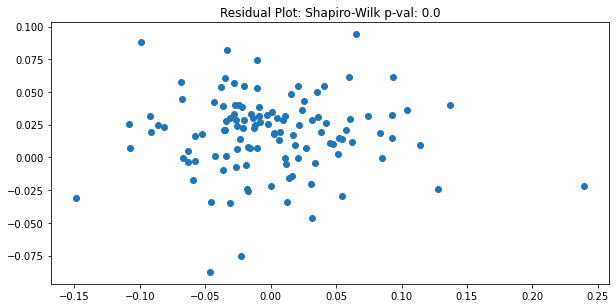

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     6.176
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.35e-05
Time:                        18:26:15   Log-Likelihood:                 171.33
No. Observations:                 117   AIC:                            -330.7
Df Residuals:                     111   BIC:                            -314.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0172      0.006      3.078      0.0

In [148]:

# Get Alphabet as an example
i = df_sec_rets.columns.get_loc('GOOGL-US')

# Run our function on the first security (sec_col_no=0), returning only the model object, and Shapiro-Wilk stat and p-value
ols_model, y, y_hat, sw_t, sw_p = factormodel_train_single_security(sec_col_no=i, 
                                             df_tb3ms=df_tb3ms, 
                                             df_sec_rets=df_sec_rets, 
                                             df_ff_factors=df_ff_factors, 
                                             date_start=df_ff_factors.shape[0], 
                                             date_end=0, 
                                             plot_residual_scatter=True)
# Examine the fit, coefficients and OLS analytics.
print(ols_model.summary())

# Forecast E(R) for this security.
df_stock_er = factormodel_forecast_er(df_stock_factor_loadings=pd.DataFrame(ols_model.params), 
                                df_ff_factors=df_ff_factors, 
                                r_f=df_tb3ms.iloc[0,0],
                                date_start=df_ff_factors.shape[0], 
                                date_end=0,)

print("Expected Return Forecast for Stocks")
print(df_stock_er)

# Check for normality in the residuals
if sw_p < 0.10:
  print("Residuals appear to be non-normal!") # Make an error in live code 

### 3a) iv) Factor Model Applied Over Time
We now use our functions to conduct a historic simulation, stepping forward over time points in our dataset, and using a 36month sliding window to train the model for each security, at each timestep. We start in the earlies time period and end at the most recent period, generating a expected returns for each stock as we go.
At the end of this process we will be able to say which stocks we favor, and which we do not in each time period, based on the expected return our models will have predicted.


#### Simple Simulation Functions
Having run the Factor model we have forecast expected return for each security in each time step in the test period. We now need to convert these predictions into portfolio positions, to run a historic simulation.This will allow us to test how effective our stock selection is based on the forecasts of expected return.

In each period we select the top quantile (defaulting to 25th percentile) of our stock forecasts, and generate a DataFrame of equal weighted stocks that reside in this quantile.
Next we assume a certain rebalance frequency, and simualte the past returns of this portfolio. 

In [149]:
# Establish trades for 6monthly rebalances: Return a full DF of trade weights (per column/security)
# For every time slice, set the highest quantile as equal weighted trades
# Quantiles have nan entries and zero entries removed
def trades_topquantile_generate(df_all_er: pd.DataFrame,
                            rebalance_freq: int,
                            min_quantile_to_buy: float = 0.75) -> pd.DataFrame:

  # Sanity
  if df_all_er.index[1] < df_all_er.index[2]:
    raise TypeError("Sort order of dates is wrong. Latest date should be at the top.")
  if (rebalance_freq < 0 == True) | (rebalance_freq > 60 == True):
    raise TypeError("rebalance_freq < 0 | rebalance_freq > 60.")
  if (min_quantile_to_buy < 0 == True) | (min_quantile_to_buy > 1 == True):
    raise TypeError("min_quantile_to_buy < 0 | min_quantile_to_buy > 1")

  # Initialise df_trades
  df_trades = pd.DataFrame(np.zeros((df_all_er.shape[0],df_all_er.shape[1])), columns=df_all_er.columns, index=df_all_er.index)  
  insert_zero_row = False # Error? or zero values? We insert a zero row...
  date_start_non_zero = -1 # What is the first non-zero row 

  # Progress
  pbar = tqdm()
  pbar.reset(total=(df_all_er.shape[0]-1)/rebalance_freq)  # initialise with new `total`

  # Loop through time... start to end.
  # Progress bar
  for t in range(df_all_er.shape[0]-1,0,-rebalance_freq): 
    # Progress
    pbar.update()

    # Get this period's stocks (cols), get valid stocks only
    df_opset_curr = pd.DataFrame(df_all_er.iloc[t, :]).T
    valid_secs = (df_opset_curr.iloc[0, :].isna() | df_opset_curr.iloc[0, :] != 0).to_numpy()

    # Get our 
    qu = df_opset_curr[df_opset_curr.columns[valid_secs]].quantile(q=min_quantile_to_buy, axis=1).iloc[0]
    no = df_opset_curr[df_opset_curr[df_opset_curr.columns[valid_secs]] > qu].count(axis=1).iloc[0]
    
    #Create trades row    
    df_trades_curr = pd.DataFrame(df_all_er.iloc[t, :]).T
    df_trades_curr.astype(float)
    df_trades_curr.iloc[:,:] = float(0)
    if no != 0:
      # Add equal weighted trades...
      trade_secs = ((df_opset_curr.iloc[0, :] > qu) & (df_opset_curr.iloc[0, :] != 0))
      df_trades_curr[df_trades_curr.columns[trade_secs]] =  1/no   
      
      #Record the first non-zero row
      if date_start_non_zero == -1: 
          date_start_non_zero = t

      insert_zero_row = False
    else:
      insert_zero_row = True

    # Insert zero row...
    if insert_zero_row == True: 
      df_trades_curr = pd.DataFrame(df_all_er.iloc[t, :]).T
      df_trades_curr.iloc[:,:] = float(0.00000)

    # Overwrite date/time row in df_trades
    df_trades = df_trades.drop(axis=0, index=df_trades_curr.index)
    df_trades = df_trades.append(df_trades_curr)

    # Progress
    #print('Processing date: ' + str(df_trades.index[-1]))

  # Correct the sort order...
  df_trades = df_trades.sort_index(ascending=False)

  #Sanity... Trades in each period totals a max of 100%? if non-zero.
  if ((df_trades.sum(axis=1).max() > 1.001 == True) | (df_trades.sum(axis=1).max() < 99.999 == True)):
    raise TypeError("Sanity checks on returns failed")

  # Progress
  pbar.reset()
    
  return df_trades

# Run the function to establish simple positio sizes based
df_trades = trades_topquantile_generate(df_all_er=df_all_er, rebalance_freq=6, min_quantile_to_buy=0.4)

0it [00:00, ?it/s]

We can review the trades created. Trades should be an equal size in each period, and should be created in those securities where the value is greater than the quantile specified (top 25% by default) 

In [150]:
df_trades

TICKER,HLLOF-US,HLIT-US,HLIO-US,HLFDF-US,HLF-US,HLE-EC,HLDVF-US,HLDCY-US,HL-US,HKTTY-US,...,AAOI-US,AAME-US,AAMC-US,AAL-US,AAIC-US,AAGRY-US,AACAY-US,AACAF-US,AA-US,A-US
202207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Take the trades we have just generated and run a historic simulation.

A historic simulation. A simple simulation function 

0it [00:00, ?it/s]

                                      Analytics
Total Return (TR)(annualized)          0.015797
Standard deviation (SD) (annualized)   0.059687
Sharpe Ratio (TR/SD)                   0.264660


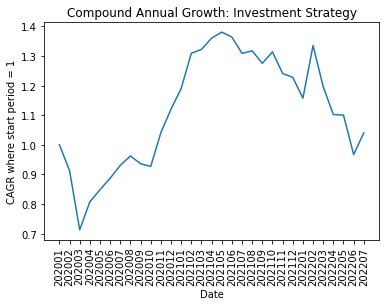

<Figure size 720x1440 with 0 Axes>

In [163]:
import matplotlib.pyplot as plt
import math

# Simulation routine
def run_sim(df_trades: pd.DataFrame,
            df_sec_rets: pd.DataFrame, 
            rebalance_freq: int = 6,
            transaction_costs: float = 0.001,
            show_analytics: bool = True,
            date_start_of_sim: int = -1) -> pd.DataFrame:
  # Sanity
  # Period1 must have a 100% allocation...
  if ((df_trades.sum(axis=1).max() > 1.001 == True) | (df_trades.sum(axis=1).max() < 99.999 == True)):
    raise TypeError("Trades pass in do not all sum to 100%")
  if df_trades.index[0] < df_trades.index[-1]:
    raise TypeError("df_trades needs to have the latest date at the top")
  if date_start_of_sim > df_trades.shape[0]-2:
    raise TypeError("date_start_of_sim > df_trades.shape[0]-2")

  if date_start_of_sim == -1:
    date_start_of_sim = df_trades.shape[0]-2

  # Ini CAGR of each security as the initial trade
  df_sec_cagr = pd.DataFrame(np.zeros((date_start_of_sim+2, df_trades.shape[1])), columns=df_trades.columns, index=df_trades.index[0:date_start_of_sim+2])
  df_sec_cagr.astype(float)
  df_sec_cagr.columns = df_trades.columns
  df_sec_cagr = df_sec_cagr.astype(float)
  df_trades = df_trades.astype(float)
  cagr_total = -1
  period_no = -1

  # Progress
  pbar = tqdm()
  pbar.reset(total=date_start_of_sim)  # initialise with new `tota

  # Step through time: rebalance_freq
  for t in range(date_start_of_sim, -1, -1):
    # Progress
    pbar.update()

    # Trades in period?
    if (df_trades.iloc[t,:].sum() != 0):
      # Start positions
      #===============================================
      if cagr_total == -1:
        df_sec_cagr.iloc[t,:] = df_trades.iloc[t,:]
        cagr_total = df_sec_cagr.iloc[t,:].sum(skipna=True)
        period_no = 0

        #Sanity
        if (round(cagr_total, 2) != 1):
          raise TypeError("Initial trades do not equal 100% Row: " + str(i) + ', total:' + str(round(cagr_total,2)))       

      else:
        # Establish any buy trades in the period...
        #================================================
        trade_buy_flag = ((df_trades.iloc[t,:] != np.nan) & (df_trades.iloc[t,:] > 0)).to_list()
        trade_buy_cols = df_trades[df_trades.columns[trade_buy_flag]]    
        tot_buy_trades = df_trades[df_trades.columns[trade_buy_flag]].iloc[t,:].sum(skipna=True) 
        
        # Sanity: All trades are assumed to be rebalances of 100% of the portfolio
        if round(tot_buy_trades,2) != 1:
          raise TypeError('Trades must equal 100% not:')  
        if df_trades.columns[trade_buy_flag].__len__() == 0:
          raise TypeError('No valid trades')  

        # Positions roll forwards...
        #================================================
        df_sec_cagr.iloc[t,:] = df_sec_cagr.iloc[t+1,:] * (1+df_sec_rets.iloc[t,:])
        cagr_total = df_sec_cagr.iloc[t,:].sum()

        # Execute Sell/Buys instantaneously at the close.
        # (We overwrite the CAGR of the buy trades with the new trade* cagr_total,
        # and we zero out the sell trades, having already added their contribution to the cagr_total)
        #================================================      
        # Remove all positions
        df_sec_cagr.iloc[t, :] = 0
        #df_sec_cagr[df_sec_cagr.columns[trade_buy_flag]].iloc[t,:] = df_trades[df_trades.columns[trade_buy_flag]].iloc[t,:].copy() * cagr_total
        for j in range(df_sec_cagr.shape[1]):
          if trade_buy_flag[j]:
            df_sec_cagr.iloc[t,j] =  df_trades.iloc[t,j] * cagr_total
        
        #Sanity
        if len(df_trades.columns[trade_buy_flag]) == 0:
          raise TypeError('df_trades.columns[trade_buy_flag].__len__() == 0')       
        if len(df_sec_cagr.columns[trade_buy_flag]) == 0:
          raise TypeError('f_sec_cagr.columns[trade_buy_flag].__len__() == 0')       

        #Transaction costs
        #trans_costs_current = abs(df_trades[df_trades.columns[trade_buy_flag]].iloc[t,:] - df_sec_cagr[df_sec_cagr.columns[trade_buy_flag]].iloc[t,:]/cagr_total)
        #trans_costs_current_applied = df_trades[df_trades.columns[trade_buy_flag]].iloc[t,:] * -abs(trans_costs_current)
        #trans_costs_current_applied = trans_costs_current_applied.copy(deep=True)
        #df_sec_cagr[df_sec_cagr.columns[trade_buy_flag]].iloc[t,:] += trans_costs_current_applied
        trans_costs_current = abs(df_trades.iloc[t,:] - df_sec_cagr.iloc[t,:]/cagr_total)
        for j in range(df_sec_cagr.shape[1]):
          if trade_buy_flag[j]:
            df_sec_cagr.iloc[t,j] += df_trades.iloc[t,j] * -abs(trans_costs_current.iloc[j])

        period_no += 1
    else:
      # No trades... Positions roll forwards...
      #================================================      
      #Sanity
      if df_sec_rets.iloc[t,:].abs().sum(skipna=True) == 0:
        raise TypeError("Returns are zero in period: " + str(i))       
      #df_sec_cagr.iloc[t,:] = df_sec_cagr.iloc[t+1,:] * (1+df_sec_rets.iloc[t,:])
      for j in range(df_sec_cagr.shape[1]):
          df_sec_cagr.iloc[t,j] =  df_sec_cagr.iloc[t+1,j] * (1+df_sec_rets.iloc[t,j])
      
      period_no += 1

  # Sort into date order
  df_sec_cagr = df_sec_cagr.sort_index(ascending=False)

  #Analytics:
  if show_analytics == True:
    # Analytics
    sim_ana = pd.DataFrame(np.zeros((3,1)))
    idx = ['Total Return (TR)(annualized)'] 
    sim_ana.iloc[0,0] =  df_sec_cagr.iloc[0,:].sum(skipna=True) ** (12/period_no) -1
    idx.append('Standard deviation (SD) (annualized)')
    sim_ana.iloc[1,0] = df_sec_cagr.iloc[0:period_no, :].sum(axis=0, skipna=True).std(skipna=True) * math.sqrt(12)
    idx.append('Sharpe Ratio (TR/SD)')
    sim_ana.iloc[2,0] = float(sim_ana.iloc[0,0]) / float(sim_ana.iloc[1,0])
    
    sim_ana.columns = ['Analytics']
    sim_ana.index = idx

    print(sim_ana)  

    #CAGR chart
    plt.plot([t for t in range(0, period_no+1)], df_sec_cagr.iloc[0:period_no+1, :].sum(axis=1, skipna=True))
    plt.xticks([t for t in range(0, period_no+1)],df_sec_cagr.index[0:period_no+1])
    ax = plt.gca()
    ax.invert_xaxis()
    plt.xticks(rotation = 90)
    plt.title('Compound Annual Growth: Investment Strategy')
    plt.xlabel('Date')
    plt.ylabel('CAGR where start period = 1')
    plt.figure(figsize=(10,20))    
    plt.show()     

  return df_sec_cagr

# Generate simple chart and analytics
def sim_chart(dict_df_sec_cagr: dict, 
             date_start_of_sim: int = -1):
  
  
  #Analytics:
  # Analytics
  sim_ana = pd.DataFrame(np.zeros((3,1)))
  idx = ['Total Return (TR)(annualized)'] 
  sim_ana.iloc[0,0] =  df_sec_cagr.iloc[0,:].sum(skipna=True) ** (12/date_start_of_sim) -1
  idx.append('Standard deviation (SD) (annualized)')
  sim_ana.iloc[1,0] = df_sec_cagr.iloc[0:date_start_of_sim, :].sum(axis=0, skipna=True).std(skipna=True) * math.sqrt(12)
  idx.append('Sharpe Ratio (TR/SD)')
  sim_ana.iloc[2,0] = sim_ana.iloc[0,0] / sim_ana.iloc[1,0]
  
  sim_ana.columns = ['Analytics']
  sim_ana.index = idx
  print(sim_ana)  

  #CAGR chart
  for df in dict_df_sec_cagr:  
    plt.plot([t for t in range(0, date_start_of_sim+1)], df.iloc[0:date_start_of_sim+1, :].sum(axis=1, skipna=True), label=df.name)
    plt.xticks([t for t in range(0, date_start_of_sim+1)],df.index[0:date_start_of_sim+1])
    
  ax = plt.gca()
  ax.invert_xaxis()
  plt.xticks(rotation = 90)
  plt.title('Compound Annual Growth: Investment Strategy')
  plt.xlabel('Date')
  plt.ylabel('CAGR where start period = 1')
  plt.legend()
  plt.figure(figsize=(10,20))
  plt.show()     

  return

# Run the simulation function
df_sec_cagr = run_sim(df_trades=df_trades, rebalance_freq=6, df_sec_rets=df_sec_rets, date_start_of_sim=60)  


Now we construct a simple benchmark from our universe...

In [ ]:
# Create a benchmark
# Run the function to establish simple positio sizes based
df_benchmark_trades = trades_topquantile_generate(df_all_er=df_all_er, rebalance_freq=6, min_quantile_to_buy=0)

df_sec_rets_copy = df_sec_rets.copy(deep=True)
df_sec_rets_copy[df_sec_rets_copy>5] = 5

# Run the simulation function
df_benchmark_sec_cagr = run_sim(df_trades=df_benchmark_trades, rebalance_freq=6, df_sec_rets=df_sec_rets_copy, date_start_of_sim=60)  

In [ ]:
sim_chart

In [ ]:
df_sec_rets

#### Bias Alert: Certainty bias

Any opinion offered about the probability, likelihood, certainty, or similar property for a hypothesis cannot be derived from statistical methods alone. In particular, significance tests and confidence intervals do not by themselves provide a logically sound basis for concluding an effect is present or absent with certainty or a given probability. This point should be borne in mind whenever one sees a conclu
sion framed as a statement of probability, likelihood, or certainty about a hypothesis. Information about the hypothesis beyond that contained in the analyzed data and in conventional statistical models (which give only data probabilities) must be used to reach such a conclusion; that information should be explicitly acknowledged and described by those offering the conclusion. Bayesian statistics offers methods that attempt to incorporate the needed information directly into the statistical model; they have not, however, achieved the popularity of P values and confidence intervals, in part because of philosophical objections and in part because no conventions have become established for their use.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4877414/

#### Bias Alert: Endogenous bias
Endogeneity bias is not a simple violation and there is no easy statistical solution. It has serious consequences for outcomes, where in the presence of endogenous variables OLS learns biased and inconsistent parameters. P-values can be seriously misleading. All it takes is one endogenous variable to seriously distort ALL OLS parameters.
https://artnet.unescap.org/tid/artnet/mtg/gravity09_tues3.pdf

One potentially concerning endogeneity is self-fulfilling prophecy of factor investing, where stocks with high correlations to commonly used factors would cause investments in those stocks, causing price appreciation, affirming that the correlations with those factors caused the price rises.


## 3b. Factor Approach with Non-linear Regression

We now examine using machine learning tools, applied to a traditional quantative framework.
Traditional linear factor approaches, after Fama and French, assume persistent long-run returns of factors, and that a stock's loadings to these factors can be (linearly) mutliplied into factor returns to find their expected return. This is likely to be a flawed assumption as stock returns do not move in straight lines with respect to factor returns. Instead of keeping this assumption, we can add a nonlinear element to the relationship between our stocks' factor loadings and returns. We can train a ML model, in this case a neural net, to find a nonlinear function to fit all of our $N$ stocks' $K$ loadings, $\beta_ij$, to all their returns, $R_{it}$:

$$
R_{it} =\overset{̃}{f}_{j=1}(β_{i1}, β_{i2}, …, β_{iK}, f_{i1}, f_{i2}, …, f_{iK})
$$

Where $R_{i}$ is the return of stock $i$ at time $t$, $\beta$ is the exposure (loading) of stock $i$, representing an observed source of inefficiency such as value, $f$ is the return of a reference portfolio $j$. 


To approximate the function $\overset{̃}{f}()$ is substantially more complex than simply assuming a linear relationship as factor models dosince it requires both the determination of this complex function.
While we may be shedding an oversimplistic assumption linear models make, we are now open to all sorts of biases in constructing our approach.

We will use an MLP neural net. To avoid ovefitting of neural net, ML is typically separated into a train and test data. Additionally, we are taking on much more complexity with this nonlinear features, with many hyperparameters needing to be specified, such as the size of the hidden layer, activation functions to choose, learning rate, and so on. The following neural net has been heuristically tuned, ie by trial and error, and this process took about 30minutes to complete. If you try changing the settings in the MLPRegressor's fit function yourself, you will see how variable the predictions are from this model. There is huge sensitivity to the typs of normalization use, the activation function used and so on. All this implies a lack of stability. Our message: avoid complex models to avoid biases. 



The MLP we will use has the following architecture, where the 11 input units relate to our 6, stock level factor coefficients (ie 5 $β$s, one $α$), and 5 corresponding factor returns over the longer run $f$. The architecture is shown with on hidden-layer, of 5 hidden units, and one output $R$.

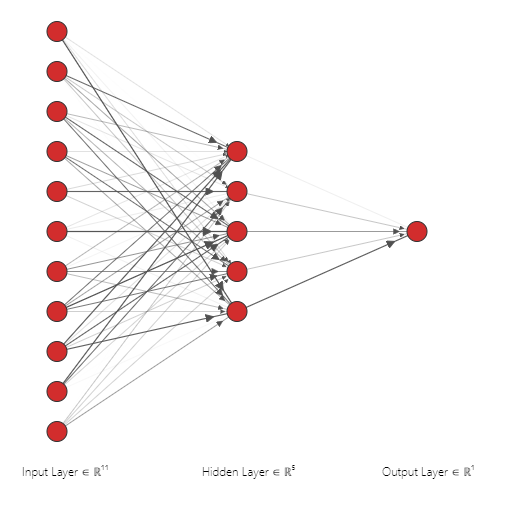

### Bias Alert: Normalization Data Snooping bias

For neural nets we almost always need to normalize (or standardize) the input data. There is room for a weak form of data snooping bias though, in historic simulations. 
We can either normlize by row (ie across a given stock's datapoints), so that each column is in proportion to the row. Or we can normlize by column. 

For stock selection applications row level normalization makes less sense, because taking PE ratio as an example, you want to compare one stock's PE ratio versus the PE ratio of all others; ie column normalize. It makes little sense to row normalize, where a stock's PE is scaled against the same stock's EBITDA/EV.  
The bias arises when we column normalize (or standardize) training data to train our model, and then pass in new data for forecasting, which may contain different min and maxes in each column. In this case all the column scalings will slightly change if the min max range changes from the training data.
In this case we can either live with the inaccuracy, or save the min-max training range and normalize the new data to the training range, capping the min/max at the training min/max, or allowing the min/max to exceed the -1/+1 range typically used for min/max scaling.


### Bias Alert: Repeated testing (multiplicity) bias

Complex machine learning approaches generally have many hyperparameters, such as neural nets, with the number of hidden nodes, the learning rate, optimizer used, activation function and so on. It is standard practices to conduct a grid search of these hyper parameters, known as hyperparameter tuning, until we find the optimum comdination. This is a problem if we are hypothesis testing the results of our model, for instance sampling the R2, and F-stat of the goodness of fit of our prediction, because the p-val is calculated to assume the probability of one test being conducted. This is known as multiplicity bias.   

Applying many tests in a single study results in an increased probability of detecting a significant finding just by chance (the problem of multiplicity). It then discusses some of the methods that have been proposed for correcting for multiplicity, including single-step procedures (e.g., Bonferroni); multistep procedures, such as those of Holm, Hochberg, and Šidák; false discovery rate control; and resampling approaches. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3015194/

### 3b i) Utility Functions: Calculate stock returns, Prep data for training/predicting

In this section we declare the function to calculate stock returns we will need as the $y$ variable for our neural net function: stock_rets_get.
We also need a function to generate the 11 inputs to the neural net: nonlinfactor_er_func_prep_data

In [ ]:

# Calculate security returns on the same term as the factor loadings.
 # This will be the input for our ML model.
 # for securities with zero values in their history, remove them
def stock_rets_get(df_tb3ms: pd.DataFrame,
                    df_sec_rets: pd.DataFrame,
                    date_start: int,
                    date_end: int,
                    window_size: int = 36) -> pd.DataFrame:
  '''
  Args:
      df_tb3ms: DataFrame containing time series of 3m risk free rate
      ols_betas_final: DataFrame containing factor loadings for all securities
      date_start: training time window start period
      date_end: training time window end period
      window_size: Factor lodings calculated over what period?
      
  Returns:
      df_all_stock_returns: stock returns, cols are stocks, rows are time points between date_start and date_end; returns annualized over window_size

  '''

  # sanity
  if df_sec_rets.shape[0] < date_start + window_size: 
    raise TypeError("df_sec_rets.shape[0] < date_start + window_size")
  if df_sec_rets.shape[0] < date_start: 
    raise TypeError("df_sec_rets.shape[0] < date_start")
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned") 

  # NB: elements of the dict = time periods. The element numbers corrspond 
  # with row numbers in all other DatFrames in this note book (eg t=1, it t=1 in all other structures)
  df_all_stock_returns = pd.DataFrame(np.zeros((date_start-date_end, df_sec_rets.shape[1])))
  df_all_stock_returns.index = df_sec_rets.index[date_end:date_start]

  z = 0
  for i in range(date_start, date_end, -1):
    # Calc stock returns, annualized
    sec_returns = df_sec_rets.iloc[i:i+window_size, :].sort_index(ascending=True)
    
    #Ignore any entries with zeros
    sec_returns = sec_returns.replace(to_replace=0, value=np.nan)
    ignore_cols = ~df_sec_rets.isna().max(axis=0)
    
    sec_returns = 1 + sec_returns.loc[:,ignore_cols]   
    sec_returns = sec_returns.loc[:,ignore_cols].prod(axis=0)
    
    # Assume monthly data, annualize
    if (window_size > 12):
      sec_returns.loc[ignore_cols] = sec_returns.loc[ignore_cols] ** (12/(window_size)) - 1  
    else:
      sec_returns.loc[ignore_cols] = sec_returns.loc[ignore_cols] - 1
    
    # All stock returns...
    df_all_stock_returns.iloc[z, ignore_cols.T] = sec_returns.T
    z += 1  
  
  return df_all_stock_returns

# Run function and get all factors loadings for all time periods
df_stock_returns = stock_rets_get(df_tb3ms=df_tb3ms,
                                        df_sec_rets=df_sec_rets,
                                        date_start = 1,
                                        date_end = 0,
                                        window_size=36)


It is a great help to have a function that wraps up the preparation of our data for training and predicting. The following function does this, where we can pass in our raw data and have it shaped for purpose.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# PRepare data for training, testing and predicting from the nn
def nonlinfactor_er_func_prep_data(df_tb3ms: pd.DataFrame,
                     df_sec_rets: pd.DataFrame,
                     df_ff_factors: pd.DataFrame,
                     date_end: int,
                     forecast_ahead: int = 6,
                     window_size: int = 36,
                     func_training_period: int = 1) -> (pd.DataFrame, pd.DataFrame):

  '''
  Args:
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_ff_factors: DataFrame containing factor return (ie reference portfolio returns such as "value") time series
      date_end: training time window end period
      window_size: return window to use when calculating stock and factor returns.
      func_training_period: pass 1 for predictions, >=1 for training. How many periods to use to train the nn? func_training_period=1 will use only one cross section, t=date_end
      
  Returns:
      X: X data used to train/test/predict
      y: X data used to train/test/predict
      stocks_included: columns in the final X and y variables (all those with nan or zeros are dropped)
  '''

  # sanity
  if df_ff_factors.shape[0] < df_ff_factors.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_ff_factors.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned") 
  if (func_training_period < 0) | (func_training_period > df_sec_rets.shape[0]):
    raise TypeError("(func_training_period < 0) | (func_training_period > df_sec_rets.shape[0]") 
  if (window_size < 0) | (window_size > df_sec_rets.shape[0]):
    raise TypeError("(window_size < 0) | (window_size > df_sec_rets.shape[0]") 
  if (forecast_ahead > date_end ):
    raise TypeError("forecast_ahead > date_end") 

  # Built training data over thei many periods: func_training_period
  # The time points to load are limited by the dtaa we have. Build X and y for window_size, func_training_period, else the longest period available...
  X = pd.DataFrame()
  y = pd.DataFrame()
  for t in range(date_end, min(df_sec_rets.shape[0]+func_training_period,
                              date_end+func_training_period, 
                              df_sec_rets.shape[0]+window_size,), 1):

    #================================
    # Get data components for X at time t: df_stock_factor_loadings, factor_excess_returns; 
    # and y: stock_returns
    #================================
    # X data...
    stock_factor_loadings, _, _ = factormodel_train_manysecurities(df_tb3ms=df_tb3ms, 
                                                  df_sec_rets=df_sec_rets, 
                                                  df_ff_factors=df_ff_factors, 
                                                  date_start=t+window_size, #<< Note we pass in the start date here
                                                  date_end=t)  #<< Note we pass in the end date here

    # X data... Factor returns to assume
    factor_excess_returns = df_ff_factors.iloc[t-forecast_ahead:t+window_size-forecast_ahead, :].sort_index()
    factor_excess_returns = np.array(1+factor_excess_returns).prod(axis=0)
    factor_excess_returns.astype(float)
    # Annualize
    if(window_size > 12):
      factor_excess_returns = factor_excess_returns ** (12/(window_size))-1  

    # Deduct rf from stock level returns, as it will have been for factor returns
    rf_ret = df_tb3ms.iloc[t-forecast_ahead:t+window_size-forecast_ahead, :].sort_index()
    rf_ret.astype(float)

    # y data... Stock level returns ... forecast ahead by forecast_ahead periods
    stock_returns = df_sec_rets.iloc[t-forecast_ahead:t+window_size-forecast_ahead, :].sort_index()
    stock_returns.astype(float)
    
    # Adjust returns for r_fs
    for j in range(0, stock_returns.shape[1]-1):      
      stock_returns.iloc[:,j] = stock_returns.iloc[:,j] - rf_ret.iloc[:,0]  # subtract r_f from each monthly return
    stock_returns = np.array(1 + stock_returns).prod(axis=0)

    # Annualize
    if(window_size > 12):
      stock_returns = stock_returns ** (12/(window_size))-1

    # Prep X and y at time for training nn 
    #================================
    # X...
    # Dimension X
    X_t = pd.DataFrame(np.zeros((stock_factor_loadings.shape[0]+df_ff_factors.shape[1], stock_factor_loadings.shape[1])))
    # For training we can have 1 or more time period using "_t" suffix; 
    # For predicting we must only have 1 time period and columns should NOT have a suffix
    if (func_training_period > 1):
      X_t.columns = [str(col) + '_' + str(t) for col in df_sec_rets.columns]
    else:
      X_t.columns = [col for col in df_sec_rets.columns]

    # Add stock loadings to X
    X_t.iloc[0:stock_factor_loadings.shape[0],:] = stock_factor_loadings.copy(deep=True) #dict is indexed off 1, DFs and arrays off 0
    X_t.astype(float)
    X_index = stock_factor_loadings.index + '_coef'

    # Add factor returns to X (duplicate for each stock)
    for j in range(0, stock_factor_loadings.shape[1]):
      X_t.iloc[stock_factor_loadings.shape[0]:, j] = factor_excess_returns
    X_index = X_index.append(df_ff_factors.columns + '_ret')
    X_t.index = X_index

    # y... 
    y_t = pd.DataFrame(stock_returns.copy()).T #dict is indexed off 1, DFs and arrays off 0
    # For training we can have 1 or more time period using "_t" suffix; 
    # For predicting we must only have 1 time period and columns should NOT have a suffix
    if (func_training_period > 1):
      y_t.columns = [str(col) + '_' + str(t) for col in df_sec_rets.columns]
    else:
      y_t.columns = [col for col in df_sec_rets.columns]
    y_t.index = ['ALL']
    
    # Refine X and y
    X_t = X_t.replace(to_replace=0, value=np.nan)
    y_t = y_t.replace(to_replace=0, value=np.nan)

    X_invalid_cols_to_drop = X_t.columns[X_t.isna().sum()>0]
    y_invalid_cols_to_drop = y_t.columns[y_t.isna().sum()>0]
    invalid_cols_to_drop = X_invalid_cols_to_drop.append(y_invalid_cols_to_drop)
    invalid_cols_to_drop = invalid_cols_to_drop.unique()   

    X_t = X_t.drop(columns=invalid_cols_to_drop)
    y_t = y_t.drop(columns=invalid_cols_to_drop)      
    
    # Add X and y at time t to the master X, y
    X = pd.concat((X, X_t), axis=1) 
    y = pd.concat([y, y_t], join = 'outer', axis = 1)

  return X.T, y.T

# train nn 
nlf_X, nlf_y = nonlinfactor_er_func_prep_data(df_tb3ms=df_tb3ms, 
                                              df_sec_rets=df_sec_rets,
                                              df_ff_factors=df_ff_factors,
                                              date_end=12,
                                              forecast_ahead=6,
                                              window_size=24,
                                              func_training_period=1)
nlf_X

In [ ]:
df_sec_rets.iloc[0:50,:].isna().sum(axis=0)

### 3b. ii) Train, and Forecast Functions

Now we need functions to train our neural net, and to provide the final forecast of stock returns in a given time period. 
We will need these function to generate expected returns which will feed into our trade generating function, decaled earlier, and our simulation function, declared earlier.

In [ ]:
# Train er function
def nonlinfactor_train_er_func(df_tb3ms: pd.DataFrame,
                     df_sec_rets: pd.DataFrame,
                     df_ff_factors: pd.DataFrame,
                     date_end: int,
                     forecast_ahead: int = 12,
                     window_size: int = 36,
                     func_training_period: int = 60,
                     hidden_layer_sizes: list = [5],
                     plot_residual_scatter: bool = False) -> (object, np.array, np.array, float, float):
  '''
  Args:
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_ff_factors: DataFrame containing factor return (ie reference portfolio returns such as "value") time series
      date_end: training time window end period
      forecast_ahead: how many periods ahead should the model be trained to forecast
      window_size: return window to use when calculating stock and factor returns.
      func_training_period: how many periods to use to train the nn? func_training_period=1 will use only one cross section, t=date_end
      hidden_layer_sizes: neural net number of units in hidden layer.
      plot_residual_scatter: generate a graph of the residulas for the model
      
  Returns:
      nn_mod: trained sklearn MLP model object
      X: X data used to train
      y: y data used to train
      y_hat: insample y_hat
      sw_stat, sw_p: residual normality tests.

  '''

  # Prep data for training the nn  
  # NB: **the y returned may have invalid stocks missing
  X_nlf, y_nlf = nonlinfactor_er_func_prep_data(df_tb3ms=df_tb3ms,
                                              df_sec_rets=df_sec_rets,
                                              df_ff_factors=df_ff_factors,
                                              date_end=date_end,
                                              forecast_ahead=forecast_ahead,
                                              window_size=window_size,
                                              func_training_period=func_training_period)
  # Normalize X data... and transpose...
  X_norm = StandardScaler().fit_transform(X_nlf)  

  # Spilt into train and test data
  #X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=None)
  X_train_norm = X_norm
  y_train = y_nlf

  # Train ANN... R = f(loadings;factor returns)
  nn_mod = MLPRegressor(hidden_layer_sizes=(hidden_layer_sizes),
                          max_iter=500, 
                          learning_rate_init=0.01, 
                          random_state=0, 
                          solver='lbfgs', #'lbfgs', 
                          tol=0.001,  
                          activation='logistic') #'tanh', 'logistic')

  nn_mod = nn_mod.fit(X=X_train_norm, y=np.ravel(y_train)) 

  # Predict in sample
  y_hat = nn_mod.predict(X_train_norm)
  resid = y_train.values-y_hat

  # In sample prediction: Examine residuals for normality... 
  # NB: The null hypothesis (H0) states that the variable is normally distributed, 
  # and the alternative hypothesis (H1) states that the variable is NOT normally distributed.  
  sw_stat, sw_p = shapiro(resid)
  
  # Optional ...
  if plot_residual_scatter == True:   
    # square plot     
    fig, ax = plt.subplots()
    ax.scatter(y_train.iloc[:,0]-y_hat, y_hat)        
    ax.set_aspect(aspect=1)
    plt.title('Residual Plot: Shapiro-Wilk p-val: ' + str(round(sw_p, 2)))
    plt.figure(figsize=(5,5))
    plt.show()   

  return nn_mod, X_nlf, y_nlf, y_train, y_hat #, sw_stat, sw_p 

# train nn 
nn_model, X_nlf, y_nlf, y_train_nlf, y_hat_nlf = nonlinfactor_train_er_func(df_tb3ms=df_tb3ms, 
                                              df_sec_rets=df_sec_rets,
                                              df_ff_factors=df_ff_factors,
                                              date_end=0,
                                              window_size=36,
                                              func_training_period=12,
                                              plot_residual_scatter=True)


### Bias Alert: Complexity Bias
Using a complex model such as a neural net may be appealing but number of parameters the model needs to have trained may exceed our rule of thumb for complexity. It may in anycase, not an ideal learner to apply, if a more simple approach achieves a similar result. 


In [ ]:
# count the number of parameters in the MLP
param_count = 0
for i in range(0, nn_model.coefs_.__len__()):
  param_count += nn_model.coefs_[i].shape[0]


# Sanity Check: Biases ************************
failed, _, _ = bias_complexity_check_regression(no_of_instances=36, # Try to use  36month window to train the MLP
                                    no_of_features=X_nlf.shape[1]-1, # Do not count intercept
                                    no_of_parameters=param_count) 
if failed == True:
  print("************ Complexity bias warning ***************")  
# Sanity Check: Biases ************************

In [ ]:
# Forecast the expected return of all stocks at a single time point.
def nonlinfactor_forecast_er(nn_model: object,                             
                            df_tb3ms: pd.DataFrame,
                            df_sec_rets: pd.DataFrame,
                            df_ff_factors: pd.DataFrame,
                            date_end: int,
                            forecast_ahead: int = 6,
                            window_size: int = 36) -> pd.DataFrame:

  '''
  Args:
      nn_model: MLPRegression object from sklearn
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_ff_factors: DataFrame containing factor return (ie reference portfolio returns such as "value") time series
      date_end: training time window end period
      window_size: return window to use when calculating stock and factor returns.
      
  Returns:
      e_r: expected returns for all stocks at time point date_end
  '''

  # sanity
  if (window_size < 0) | (window_size > df_sec_rets.shape[0]):
    raise TypeError("(window_size < 0) | (window_size > df_sec_rets.shape[0]") 
  if df_ff_factors.shape[0] < df_ff_factors.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_ff_factors.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned") 
  if (window_size < 0) | (window_size > df_sec_rets.shape[0]):
    raise TypeError("(window_size < 0) | (window_size > df_sec_rets.shape[0]") 

  # Factor returns to assume, annualized...
  factor_excess_returns = df_ff_factors.iloc[date_end:date_start, :].sort_index()
  factor_excess_returns = np.array(1+factor_excess_returns.iloc[date_end:date_start, :]).prod(axis=0)

  # Annulize monthly returns
  if ((window_size) > 12):
    factor_excess_returns = factor_excess_returns ** (12/((window_size)))-1
  else:
    factor_excess_returns = factor_excess_returns-1
    
  # Prep data for training the nn  
  # Only use the latets period: func_training_period=1
  #==================================='  
  X_test, y_test = nonlinfactor_er_func_prep_data(df_tb3ms=df_tb3ms,
                                              df_sec_rets=df_sec_rets,
                                              df_ff_factors=df_ff_factors,
                                              date_end=date_end,
                                              forecast_ahead=forecast_ahead,
                                              window_size=window_size,
                                              func_training_period=1)

  X_test_index = X_test.index.to_list()

  #*Quirk ... Sklearn needs 2D array to predict - insert zero row...
  blank_row = np.repeat([999999], X_test.shape[1])
  X_test = np.vstack((X_test, blank_row))

  # Stock Forecast E(R)_i,t+h
  e_r = nn_model.predict(X_test)

  # r_f...
  e_r[(e_r!=0)] = e_r[(e_r!=0)] + df_tb3ms.iloc[date_end,0]

  # *Remove the added instance (99999) above...
  e_r = pd.DataFrame(e_r)
  e_r = e_r.iloc[0:-1,:]  
  e_r.index = X_test_index

  return e_r

# Run 
nlf_er = nonlinfactor_forecast_er(nn_model=nn_model, 
                                    df_tb3ms=df_tb3ms, 
                                    df_sec_rets=df_sec_rets,
                                    df_ff_factors=df_ff_factors,
                                    date_end=0,
                                    window_size=36)



It is also possible to examine the MLP model, using SHAP. Which inputs most influenced the return outcomes in the period we used to training the model?

In [ ]:
# We may need to install shap..
!pip install shap

In [ ]:
import shap

# SHAP XAI on the training data
X_nlf_sample = shap.sample(X_nlf, 100)
explainer = shap.KernelExplainer(nn_model.predict, X_nlf_sample)
#explainer = shap.Explainer(nn_model)
shap_values = explainer.shap_values(shap.sample(X_nlf, 100))
shap.summary_plot(shap_values, X_nlf_sample.values, feature_names=X_nlf_sample.columns)

In [ ]:
df_sec_rets

Now we can implement a function that applies the forecasting function over the study term, ready for historic simulation testing.

In [ ]:
# Calc all expected returns for all stocks and all time periods.
# Loop through time, from the earliest period, to the latest, calculating E(R) for every stock we have data for in each time period
# We will generate a DataFrame containing the expected returns for each stock in each period as we go.
def nonlinfactor_forecast_all_er(df_tb3ms: pd.DataFrame,
                      df_sec_rets: pd.DataFrame,
                      df_ff_factors: pd.DataFrame,
                      date_start: int,
                      window_size: int = 50, 
                      func_training_period: int = 24) -> (pd.DataFrame, object):

  '''
  Args:
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_ff_factors: DataFrame containing factor return (ie reference portfolio returns such as "value") time series
      int
      window_size: return window to use when calculating stock and factor returns.
      func_training_period: window to use to train the nn function of loadings and factor returns to expevcted return ...
      
  Returns:
      df_all_er: expected returns forecast for all stocks across all time periods
  '''

  # E(R) for each stock, in each time period
  df_all_er = pd.DataFrame(np.zeros((df_sec_rets.shape[0]-window_size, df_sec_rets.shape[1])))
  df_all_er.index = df_sec_rets.index[0:df_sec_rets.shape[0]-window_size]
  df_all_er.columns = df_sec_rets.columns[0:df_sec_rets.shape[1]] #.astype(int)
  #
  df_stock_SW_pval = df_all_er.copy(deep=True)

  # Progress
  pbar = tqdm()
  pbar.reset(total=df_ff_factors.shape[0]-max(func_training_period,window_size)-1)  # initialise with new `total`

  #Step through time... earliest to latest.
  for t in range(df_ff_factors.shape[0]-max(func_training_period,window_size)-1, -1, -1):
    
    # Progress
    pbar.update()

    # Run our function, returning only the result object
    df_stock_factor_loadings, _, _ = factormodel_train_manysecurities(df_tb3ms=df_tb3ms, 
                                              df_sec_rets=df_sec_rets, 
                                              df_ff_factors=df_ff_factors, 
                                              date_start=t+window_size, #<< Note we pass in the start date here
                                              date_end=t)  #<< Note we pass in the end date here
    
    
    # Get function of security returns = f(loadings and factor returns)
    nn_mod, _, _, _, _ = nonlinfactor_train_er_func(df_tb3ms = df_tb3ms, 
                                              df_sec_rets = df_sec_rets,
                                              df_ff_factors = df_ff_factors,
                                              date_end = t,
                                              window_size = 36,
                                              func_training_period = 1)
    
    # Get forecast returns...
    nlf_er = nonlinfactor_forecast_er(nn_model=nn_model, 
                                      df_tb3ms=df_tb3ms, 
                                      df_sec_rets=df_sec_rets,
                                      df_ff_factors=df_ff_factors,
                                      date_end=t,
                                      window_size=window_size)
    
    
    # Forecasts may not have the the cols/stocks of df_sec_rets (invalid cols/stocks will be dropped)
    row_nlf_er = nlf_er.T
    nlf_er_all_cols = pd.DataFrame(np.zeros((1,df_sec_rets.shape[1])))
    nlf_er_all_cols.columns = df_sec_rets.columns
    nlf_er_all_cols[row_nlf_er.columns] = row_nlf_er
    
    df_all_er.iloc[t,:] = nlf_er_all_cols

  return df_all_er, nn_mod

# Run the function with our data
df_nlf_all_er, nn_mod_latest = nonlinfactor_forecast_all_er(df_tb3ms=df_tb3ms, 
                   df_sec_rets=df_sec_rets,
                   df_ff_factors=df_ff_factors,
                   date_start = 36,
                   window_size=36, 
                   func_training_period=1)

# Examine the returns generated
df_nlf_all_er

### 3b) iii) Non-linear Factor Model Applied Over Time
Using our simulation functions decalred earlier, we can run a simulation using our non-linear factor model.

Finally we run our stock selection and simulation functions, applied to the non-linear factor approach...

In [ ]:
# Run the function to establish simple positio sizes based
df_nlf_trades = trades_topquantile_generate(df_all_er=df_nlf_all_er, rebalance_freq=6, min_quantile_to_buy=0.8)

# Run the simulation function
df_non_lin_sec_cagr = run_sim(df_trades=df_nlf_trades, rebalance_freq=6, df_sec_rets=df_sec_rets, date_start_of_sim=36)  

## 3c. Interpretable Machine Learning Approach


Now, rather than using a ML retrofit to traditional quantitative investing approach, we will use a purpose designed machine learning approach which is interpretable, and associative (a weaker take on causality, avoiding frequentist approaches that might just identify correlation not causation). This is a form of symbollic artificial intelligence (SAI), where the symbols are actually investment-rules. This ML approach will automatically find associations between our input features and our ground truth.






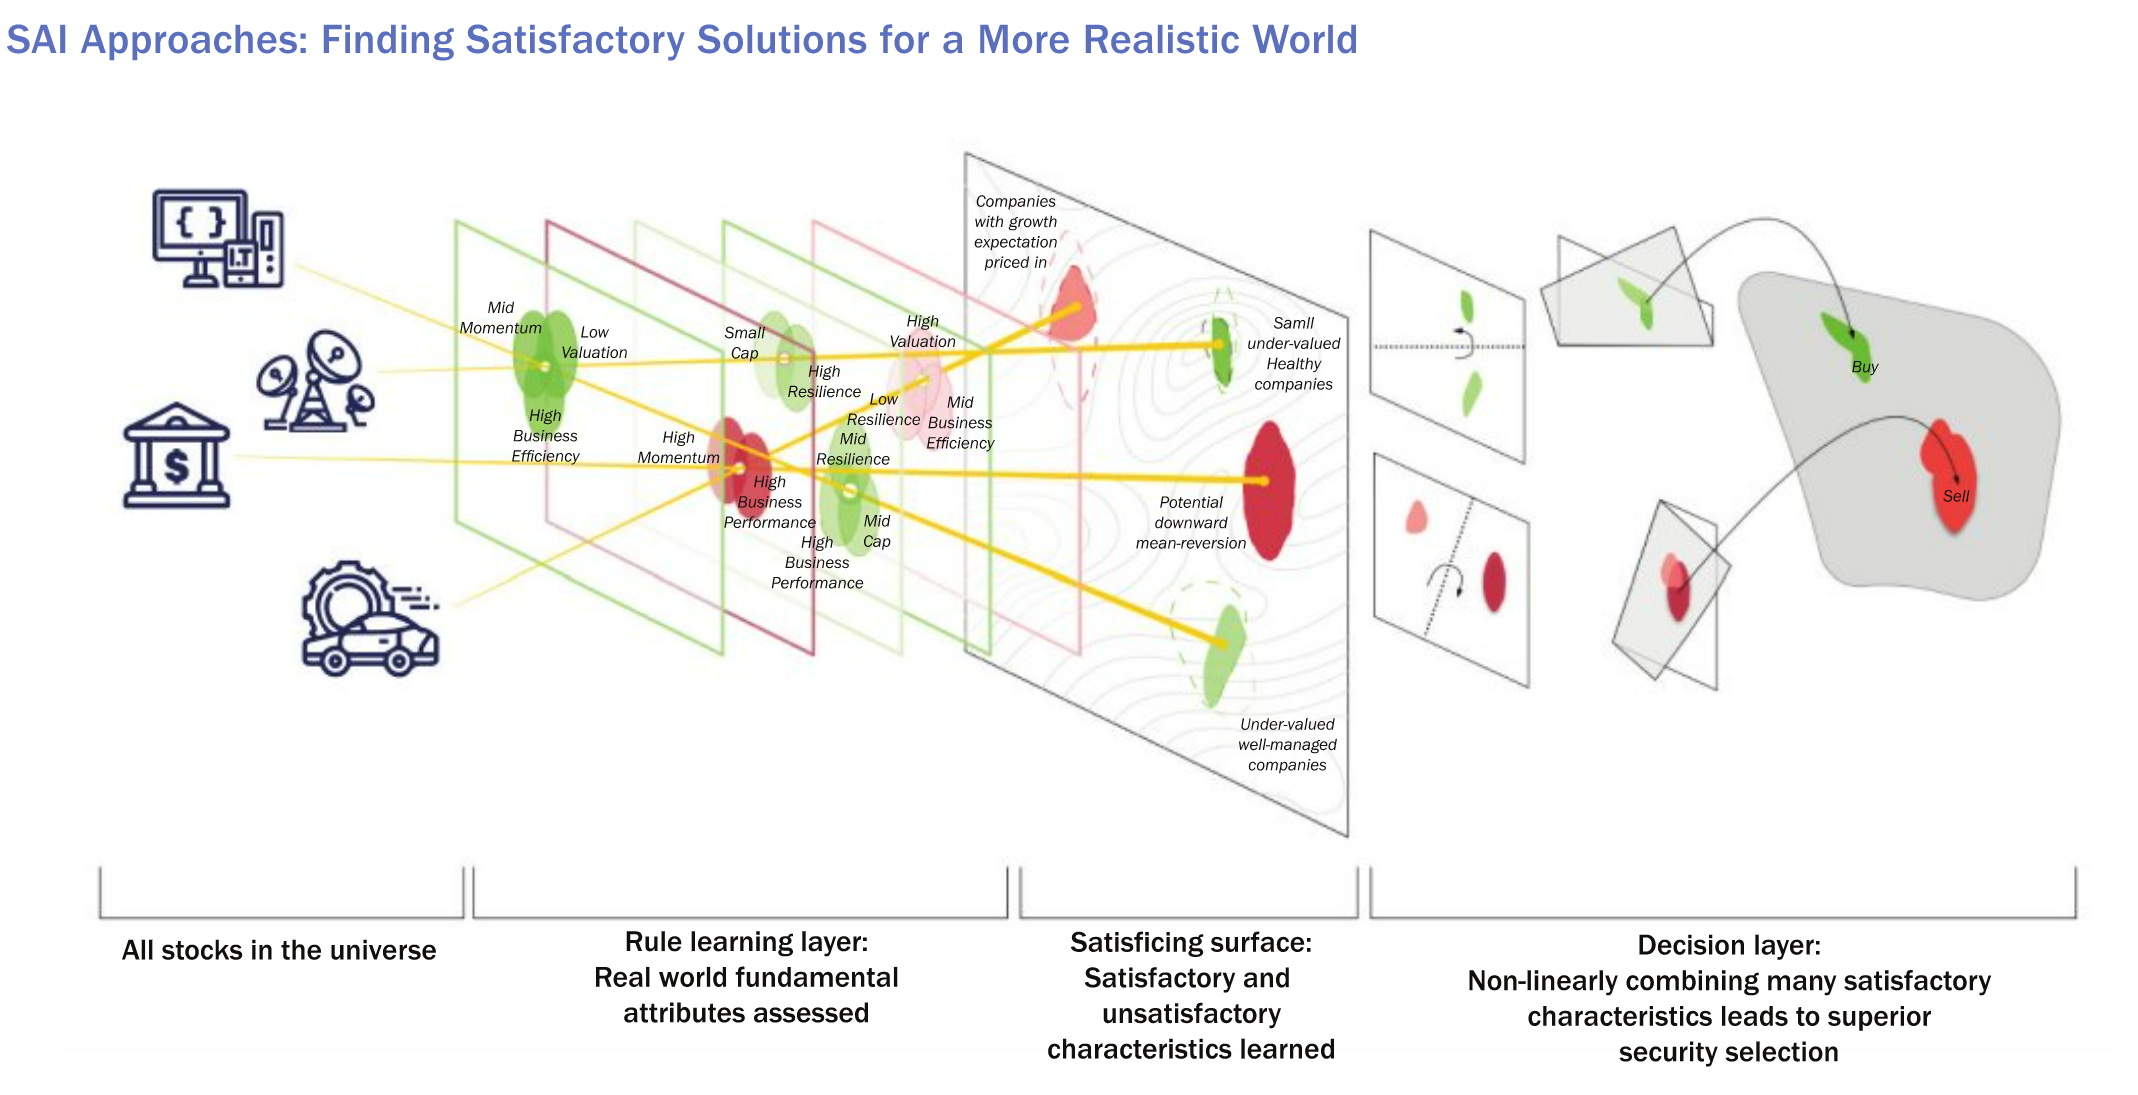

### Mitigating Biases: Rules based ML
Rules based ML can avoid many of the biases in parametric investment models. 
Rules are non parametric (although rule learning may be). They assume no distribution, so there can be no violations of parametric assumptions as a result. Rules are also interpretable. Any stake holder should be able to review investment rules and gain some understanding of the way a model is operating, so long as the input functions remain qualitatively meaningful (eg earnings metrics, factor exposures and so on, rather than latent variables). Rules are also most easily considered as a classification problem, true or false. As a classification problem (rather than a regresion problem) , fewer data points and more features are able to be used under our complexity rules of thumb.
Certain rule learning approaches can be applied to a high number of features, avioding the need for explicit dimensionality reduction, which in the case of approaches such as PCA, can introduce more inductive biases and assumptions.


Install the SAI package...

In [ ]:
!pip install investsai -q

Import it...

In [ ]:
import investsai 


### 3c. i) Utility Function: Prep data for training/predicting

For SAI our data preparation function to generate X and y variables is different. Firstly, the X variables are features, ie anything that might drive the model to find a better outcome. This can include traditional factors, but can also include fundamentals, valuations, ratios, sentiment scores, macro data affecting the coubtry or risk or domicile of a stock, and just about any other numeric attribubte at the stock level.

In [ ]:
## Prepare data for training, testing and predicting from the nn
def sai_er_func_prep_data(df_tb3ms: pd.DataFrame,
                     df_sec_rets: pd.DataFrame,
                     dict_input_features: dict,
                     date_end: int,
                     y_min_quantile_to_buy: float = 0.75,
                     window_size: int = 36,
                     func_training_period: int = 1) -> (dict, dict):


  '''
  Args:
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_input_features: DataFrame containing input features, which can include traditional factors as well as mainly unaltered fundamentals, ratios, sentiment indicators, or just about anything else relating to stock level attributes...
      date_end: training time window end period
      y_min_quantile_to_buy: Y variable is a binary classifier. We ask here > what percentile represents "y=1" (and below this a y=0)
      window_size: return window to use when calculating stock and factor returns.
      func_training_period: pass 1 for predictions, >=1 for training. How many periods to use to train the nn? func_training_period=1 will use only one cross section, t=date_end
      
  Returns:
      X: X data used to train/test/predict
      y: X data used to train/test/predict
  '''

  # sanity
  if df_ff_factors.shape[0] < df_ff_factors.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_ff_factors.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned") 
  if (func_training_period < 0) | (func_training_period > df_sec_rets.shape[0]):
    raise TypeError("(func_training_period < 0) | (func_training_period > df_sec_rets.shape[0]") 
  if (window_size < 0) | (window_size > df_sec_rets.shape[0]):
    raise TypeError("(window_size < 0) | (window_size > df_sec_rets.shape[0]") 
  if (y_min_quantile_to_buy < 0) | (y_min_quantile_to_buy > 1):
     raise TypeError("(yeq1_is_top_nth_percentile < 0) | (yeq1_is_top_nth_percentile > 1)") 

  # Built training data over thei many periods: func_training_period
  # The time points to load are limited by the dtaa we have. Build X and y for window_size, func_training_period, else the longest period available...
  dic_X = dict()
  dic_y = dict()
  for t in range(date_end, min(df_sec_rets.shape[0]+func_training_period,
                              date_end+func_training_period, 
                              df_sec_rets.shape[0]+window_size,), 1):  
    #================================
    # Get data components for X at time t: df_stock_factor_loadings, factor_excess_returns; 
    # X is the hypothetical, arithmetic returns for each stock: loadings * factor returns + alpha (unannualized)
    # and y: stock_returns as a binary {1,0}
    #================================
    # X data...
    stock_factor_loadings, _, _ = factormodel_train_manysecurities(df_tb3ms=df_tb3ms, 
                                                  df_sec_rets=df_sec_rets, 
                                                  df_ff_factors=df_ff_factors, 
                                                  date_start=t+window_size, #<< Note we pass in the start date here
                                                  date_end=t)  #<< Note we pass in the end date here
    # X data... Factor returns to assume
    factor_excess_returns = df_ff_factors.iloc[t:t+window_size, :].sort_index()
    factor_excess_returns = np.array(1+factor_excess_returns).prod(axis=0)
    factor_excess_returns.astype(float)
    # Annualize
    if(window_size > 12):
      factor_excess_returns = factor_excess_returns ** (12/(window_size))-1
    
    # Deduct rf from stock level returns, as it will have been for factor returns
    rf_ret = df_tb3ms.iloc[t:t+window_size, :].sort_index()
    rf_ret.astype(float)

    # y data... Stock level returns
    stock_returns = df_sec_rets.iloc[t:t+window_size, :].sort_index()
    stock_returns.astype(float)
    
    # Adjust returns for r_fs
    for j in range(0, stock_returns.shape[1]-1):      
      stock_returns.iloc[:,j] = stock_returns.iloc[:,j] - rf_ret.iloc[:,0]  # subtract r_f from each monthly return
    stock_returns = np.array(1+stock_returns).prod(axis=0)
    # Annualize
    if(window_size > 12):
      stock_returns = stock_returns ** (12/(window_size))-1

    # Prep X and y  at time for training nn 
    #================================
    # X...
    # Dimension X
    X_t = pd.DataFrame(np.zeros((stock_factor_loadings.shape[0], stock_factor_loadings.shape[1])))
    # For training we can have 1 or more time period using "_t" suffix; 
    # For predicting we must only have 1 time period and columns should NOT have a suffix
    if (func_training_period > 1):
      X_t.columns = [str(int(col)) + '_' + str(t) for col in df_sec_rets.columns]
    else:
      X_t.columns = [col for col in df_sec_rets.columns]
    
    # Add stock loadings to X
    X_t.iloc[0:stock_factor_loadings.shape[0],:] = stock_factor_loadings.copy(deep=True) #dict is indexed off 1, DFs and arrays off 0
    X_t.astype(float)
    X_index = stock_factor_loadings.index + '_hypo_er'

    # Calc hypothetical return of each factor loadings to each stock: ignore alpha (start from element 1 "1:stock_factor_loadings.shape[0]")
    for j in range(1, stock_factor_loadings.shape[1]):
      X_t.iloc[1:stock_factor_loadings.shape[0], j] = factor_excess_returns * X_t.iloc[1:stock_factor_loadings.shape[0], j]
    X_t.index = X_index
    
    # y... 
    y_t = pd.DataFrame(stock_returns.copy()).T #dict is indexed off 1, DFs and arrays off 0
    # For training we can have 1 or more time period using "_t" suffix; 
    # For predicting we must only have 1 time period and columns should NOT have a suffix
    if (func_training_period > 1):
      y_t.columns = [str(int(col)) + '_' + str(t) for col in df_sec_rets.columns]
    else:
      y_t.columns = [col for col in df_sec_rets.columns]
    y_t.index = ['ALL']

    # Refine X and y
    X_t = X_t.replace(to_replace=0, value=np.nan)
    y_t = y_t.replace(to_replace=0, value=np.nan)

    X_invalid_cols_to_drop = X_t.columns[X_t.isna().sum()>0]
    y_invalid_cols_to_drop = y_t.columns[y_t.isna().sum()>0]
    invalid_cols_to_drop = X_invalid_cols_to_drop.append(y_invalid_cols_to_drop)
    invalid_cols_to_drop = invalid_cols_to_drop.unique()

    X_t = X_t.drop(labels=invalid_cols_to_drop, axis=1)
    y_t = y_t.drop(labels=invalid_cols_to_drop, axis=1)

    # y is a binary classifier for this implementation of SAI
    qu = y_t.quantile(q=y_min_quantile_to_buy, axis=1).iloc[0]

    # Add equal weighted trades...
    y_buys = ((y_t.iloc[0, :] > qu) & (y_t.iloc[0, :] != 0))
    y_binary_t = y_t.copy(deep=True)
    y_binary_t[y_t.columns[y_buys]] =  1     
    y_binary_t[y_t.columns[~y_buys]] =  0  

    # n * m matrix: n stocks, m features.
    dic_y[t] = y_binary_t
    dic_X[t] = X_t.T

  return dic_y, dic_X

# train nn 
sai_X, sai_y = sai_er_func_prep_data(df_tb3ms=df_tb3ms, 
                                              df_sec_rets=df_sec_rets,
                                              dict_input_features=dict_input_features,
                                              date_end=0,
                                              y_min_quantile_to_buy=0.8,
                                              window_size=36,
                                              func_training_period=3)

sai_X

### 3c. ii) Train, and Forecast Functions

Now we need functions to train our SAI model and to provide the final outcome, which is a buy/sell decision for each stock in a given time period. 
We will need these functions to feed into our trade generating function, decaled earlier, and our simulation function, declared earlier.

In [ ]:
 # Train er function
def sai_train_er_func(df_tb3ms: pd.DataFrame,
                    df_sec_rets: pd.DataFrame,
                    df_input_features: pd.DataFrame,
                    date_end: int,
                    y_min_quantile_to_buy: float = 0.75,
                    window_size: int = 36,
                    func_training_period: int = 60,
                    hidden_layer_sizes: list = [5],
                    plot_residual_scatter: bool = False) -> (object, np.array, np.array, float, float):
  '''
  Args:
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_input_features: DataFrame containing input features, which can include traditional factors as well as mainly unaltered fundamentals, ratios, sentiment indicators, or just about anything else relating to stock level attributes...
      date_end: training time window end period
      window_size: return window to use when calculating stock and factor returns.
      func_training_period: how many periods to use to train the nn? func_training_period=1 will use only one cross section, t=date_end
      hidden_layer_sizes: neural net number of units in hidden layer.
      plot_residual_scatter: generate a graph of the residulas for the model
      
  Returns:
      nn_mod: trained sklearn MLP model object
      X: X data used to train
      y: y data used to train
      y_hat: insample y_hat
      sw_stat, sw_p: residual normality tests.

  '''

  # Prep data for training the nn  
  #==================================='
  sai_X, sai_y = sai_er_func_prep_data(df_tb3ms=df_tb3ms,
                                      df_sec_rets=df_sec_rets,
                                      df_input_features=df_input_features,
                                      date_end=date_end,
                                      y_min_quantile_to_buy=y_min_quantile_to_buy,
                                      window_size=window_size,
                                      func_training_period=func_training_period)
 
  # train SAI
  #================================
  # Input parameters
  params = {
      'q': 3,
      'parallel': True,
      'nb_workers': 2
  }
  # Train SAI... 
  invest_sai = SAI(params=params)
  sai_mod = invest_sai.fit(X=sai_X, y=sai_y)

  # Predict in sample
  y_hat = sai_mod.predict(sai_X)
  dic_resid = sai_y-y_hat
  resid  = pd.DataFrame(list(dic_resid.items()), columns = ['y']) 

  # In sample prediction: Examine residuals for normality... 
  # NB: The null hypothesis (H0) states that the variable is normally distributed, 
  # and the alternative hypothesis (H1) states that the variable is NOT normally distributed.  
  sw_stat, sw_p = shapiro(resid)
  
  # Optional ...
  if plot_residual_scatter == True:   
    # square plot     
    fig, ax = plt.subplots()
    ax.scatter(sai_y.iloc[:,0]-y_hat, y_hat)        
    ax.set_aspect(aspect=1)
    plt.title('Residual Plot: Shapiro-Wilk p-val: ' + str(round(sw_p, 2)))
    plt.show()

    print(f'\n\nInterpretable rules with conditional probailities to rank securities\n{invest_sai.rules}\n')
    print(f'\nRanking of securities in XTest\n{yTest}\n')

  return sai_mod, sai_X, sai_y, sw_stat, sw_p 


nn_mod, sai_X, sai_y = sai_train_er_func(df_tb3ms=df_tb3ms,
                    df_sec_rets=df_sec_rets,
                    df_ff_factors=df_ff_factors,
                    date_end=0,
                    y_min_quantile_to_buy= 0.75,
                    window_size = 36)

In [ ]:
# Forecast the expected return of all stocks at a single time point.
def sai_forecast_er(nn_model: object,                             
                            df_tb3ms: pd.DataFrame,
                            df_sec_rets: pd.DataFrame,
                            df_input_features: pd.DataFrame,
                            date_end: int,
                            window_size: int = 36) -> pd.DataFrame:

  '''
  Args:
      nn_model: MLPRegression object from sklearn
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_input_features: DataFrame containing input features, which can include traditional factors as well as mainly unaltered fundamentals, ratios, sentiment indicators, or just about anything else relating to stock level attributes...
      date_end: training time window end period
      window_size: return window to use when calculating stock and factor returns.
      
  Returns:
      e_r: expected returns for all stocks at time point date_end
  '''
  # sanity
  if (window_size < 0) | (window_size > df_sec_rets.shape[0]):
    raise TypeError("(window_size < 0) | (window_size > df_sec_rets.shape[0]") 
  if df_input_features.shape[0] < df_input_features.shape[1]:
    raise TypeError("Must pass factor returns as columns not rows")  
  if df_input_features.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned")  
  if df_tb3ms.index[0] != df_sec_rets.index[0]:
    raise TypeError("Dates misaligned") 
  if (window_size < 0) | (window_size > df_sec_rets.shape[0]):
    raise TypeError("(window_size < 0) | (window_size > df_sec_rets.shape[0]") 
  
  # Factor returns to assume, annualized...
  factor_excess_returns = df_input_features.iloc[date_end:date_start, :].sort_index()
  factor_excess_returns = np.array(1+factor_excess_returns.iloc[date_end:date_start, :]).prod(axis=0)

  # Annulize monthly returns
  if ((window_size) > 12):
    factor_excess_returns = factor_excess_returns ** (12/((window_size)))-1
  else:
    factor_excess_returns = factor_excess_returns-1

    
  # Prep data for training the nn  
  # Only use the latets period: func_training_period=1
  #==================================='  
  sai_X, sai_y = sai_er_func_prep_data(df_tb3ms=df_tb3ms,
                                              df_sec_rets=df_sec_rets,
                                              df_input_features=df_input_features,
                                              date_end=date_end,
                                              window_size=window_size,
                                              func_training_period=1)
  X_test_index = sai_X.index.to_list()

  #*Quirk ... Sklearn needs 2D array to predict - insert zero row...
  blank_row = np.repeat([999999], sai_X.shape[1])
  sai_X = np.vstack((sai_X, blank_row))

  # Stock Forecast E(R)_i,t+h
  e_r = nn_model.predict(sai_X)

  # r_f...
  e_r[(e_r!=0)] = e_r[(e_r!=0)] + df_tb3ms.iloc[0,date_end]

  # *Remove the added instance (99999) above...
  e_r = pd.DataFrame(e_r)
  e_r = e_r.iloc[0:-1,:]  
  e_r.index = X_test_index

  return e_r

In [ ]:
# Calc all expected returns for all stocks and all time periods.
# Loop through time, from the earliest period, to the latest, calculating E(R) for every stock we have data for in each time period
# We will generate a DataFrame containing the expected returns for each stock in each period as we go.
def sai_forecast_all_er(df_tb3ms: pd.DataFrame,
                      df_sec_rets: pd.DataFrame,
                      df_ff_factors: pd.DataFrame,
                      window_size: int = 50) -> (pd.DataFrame, object):

  '''
  Args:
      df_tb3ms: risk free rate
      df_sec_rets: stock level returns monthly
      df_ff_factors: DataFrame containing factor return (ie reference portfolio returns such as "value") time series
      window_size: return window to use when calculating stock and factor returns.
      
  Returns:
      df_all_er: expected returns forecast for all stocks across all time periods
  '''

  # E(R) for each stock, in each time period
  df_all_er = pd.DataFrame(np.zeros((df_sec_rets.shape[0]-window_size, df_sec_rets.shape[1])))
  df_all_er.index = df_sec_rets.index[0:df_sec_rets.shape[0]-window_size]
  df_all_er.columns = df_sec_rets.columns[0:df_sec_rets.shape[1]].astype(int)
  #
  df_stock_SW_pval = df_all_er.copy(deep=True)

  # Instantiate SAI object  
  sai_mod = SAI()

  #Step through time... earliest to latest.
  for t in range(df_ff_factors.shape[0]-window_size-1, -1, -1):
    # Run our function, returning only the result object
    df_stock_factor_loadings, _, _ = factormodel_train_manysecurities(df_tb3ms=df_tb3ms, 
                                              df_sec_rets=df_sec_rets, 
                                              df_ff_factors=df_ff_factors, 
                                              date_start=t+window_size, #<< Note we pass in the start date here
                                              date_end=t)  #<< Note we pass in the end date here
        
    # Get function of security returns = f(loadings and factor returns)
    sai_mod = sai_train_er_func(df_tb3ms = df_tb3ms,
                              df_sec_rets = df_sec_rets,
                              df_input_features = df_ff_factors,
                              date_end = t,
                              window_size = window_size,
                              func_training_period = 60,
                              hidden_layer_sizes = [5],
                              plot_residual_scatter = False)
    
    
    # Generate E(R) from our stock level factor model...      
    e_r = sai_forecast_er(nn_model = nn_mod,
                            df_tb3ms=df_tb3ms,
                            df_sec_rets=df_sec_rets,
                            df_input_features=df_ff_factors,
                            date_end=t)
    df_all_er.iloc[t,:] = e_r

  return df_all_er 

# Run the function with our data
df_sai_all_er, nn_mod_latest = sai_forecast_all_er(df_tb3ms=df_tb3ms, 
                   df_sec_rets=df_sec_rets,
                   df_ff_factors=df_ff_factors,
                   window_size=50)



### 3c) iv) SAI Model Applied Over Time

In [ ]:
# Run the function to establish simple positio sizes based
df_sai_trades = trades_topquantile_generate(df_all_er=df_sai_all_er, rebalance_freq=6, min_quantile_to_buy=0.8)

# Run the simulation function
df_sai_sec_cagr = run_sim(df_trades=df_sai_trades, rebalance_freq=6, df_sec_rets=df_sec_rets, date_start_of_sim=60)  

# Stage4: Model Deployment

As we have alrteady seen with the Credit Use Case, model deployment requires 

Investment model deployment requires a rigorous change process, several levels of testing and sign off, asignment of responsibilities for the live operation of the process, models and data before deployiong the code to the cloud (or on native hardware). 
A key part of this stage is monitoring of data drift, and the monitoring of stakeholder KPIs which are principally for investors, and compliance needs.
For investors, the characteristics of the strategy that were marketed and agreed with the investor, should be monitored and reported regularly with sufficient executive oversight and repotring to support it.
For Compliance, regular checking that the investment elements of the strategy are fully compliant with the investment management agreement (IMA), which organisations will tend to have in place as a separate system in any case. 


# Stage 5: Model Monitoring and Reporting